In [1]:
#–∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –≤—Å–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–º –º–æ–≥—É—Ç –ø—Ä–∏–≥–æ–¥–∏—Ç—å—Å—è
import pandas as pd
import numpy as np

from scipy import stats as st
import matplotlib.pyplot as plt

import seaborn as sb

import warnings #—á—Ç–æ–± –Ω–∞ –æ—à–∏–±–∫–∏ –Ω–µ —Ä—É–≥–∞–ª—Å—è
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('/Users/aleksandrivanov/Downloads/games.csv')

–®–∞–≥ 2. –ü–æ–¥–≥–æ—Ç–æ–≤—å—Ç–µ –¥–∞–Ω–Ω—ã–µ

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.shape

(16715, 11)

In [7]:
df.duplicated().sum() #–ø—Ä–æ–≤–µ—Ä–∏–º —Å–∞–º–æ–µ –ª–µ–≥–∫–æ–µ, —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –Ω–µ—Ç

0

In [8]:
#–ø–µ—Ä–µ–∏–º–µ–Ω—É–µ–º —Å—Ç–æ–ª–±—Ü—ã —à–∞–ø–∫–∏ 
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 
              'other_sales', 'critic_score', 'user_score', 'rating']
#–Ω–∞—à–µ–ª –ø–æ–∑–∂–µ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–π –∏ –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç–æ–π –≤–∞—Ä–∏–∞–Ω—Ç df.columns.str.lower(), –æ—Å—Ç–∞–≤–ª—é –Ω–∞ –ø–∞–º—è—Ç—å —Ç—É—Ç...

In [9]:
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [10]:
#–ø–æ—Å–º–æ—Ç—Ä–∏–º —á—Ç–æ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏
df.isnull().sum() #–Ω–∞ –ø–æ—á—Ç–∏ 17 —Ç—ã—Å—è—á –∏–≥—Ä –ø–æ—á—Ç–∏ –Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏, –∂–∞–Ω—Ä–µ –∏ –≤ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø–æ –ø—Ä–æ–¥–∞–∂–∞–º. 
#–≤ –≥–æ–¥–∞—Ö —Ç–∞–∫ –∂–µ –Ω–µ–±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ, —Ç.–µ. –æ—Å–Ω–æ–≤–Ω–∞—è –ø—Ä–æ–±–ª–µ–º–∞ –≤ –ø—Ä–æ–ø—É—Å–∫–∞—Ö —ç—Ç–æ —Å—Ç–æ–ª–±—Ü—ã —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
df[df['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

–ó–¥–µ—Å—å –æ—á–µ–Ω—å —Å—Ç–∞—Ä–∞—è –∏–≥—Ä–∞, —É –∫–æ—Ç–æ—Ä–æ–π –Ω–µ—Ç –∏–º–µ–Ω–∏, –∂–∞–Ω—Ä–∞, –º—ã –µ–π –Ω–∏—á–µ–º –Ω–µ –º–æ–∂–µ–º –ø–æ–º–æ—á—å :)

In [12]:
df[df['year_of_release'].isna()].head(15)

name platform  year_of_release  \
183                               Madden NFL 2004      PS2              NaN   
377                              FIFA Soccer 2004      PS2              NaN   
456                    LEGO Batman: The Videogame      Wii              NaN   
475                    wwe Smackdown vs. Raw 2006      PS2              NaN   
609                                Space Invaders     2600              NaN   
627                                     Rock Band     X360              NaN   
657      Frogger's Adventures: Temple of the Frog      GBA              NaN   
678   LEGO Indiana Jones: The Original Adventures      Wii              NaN   
719                                Call of Duty 3      Wii              NaN   
805                                     Rock Band      Wii              NaN   
1131                      Call of Duty: Black Ops       PC              NaN   
1142                                    Rock Band      PS3              NaN   
1301                               Triple Play 99       PS              NaN   
1506                                    Adventure     2600              NaN   
1538                   LEGO Batman: The Videogame      PSP              NaN   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183      Sports      4.26      0.26      0.01         0.71          94.0   
377      Sports      0.59      2.36      0.04         0.51          84.0   
456      Action      1.80      0.97      0.00         0.29          74.0   
475    Fighting      1.57      1.02      0.00         0.41           NaN   
609     Shooter      2.36      0.14      0.00         0.03           NaN   
627        Misc      1.93      0.33      0.00         0.21          92.0   
657   Adventure      2.15      0.18      0.00         0.07          73.0   
678      Action      1.51      0.61      0.00         0.21          78.0   
719     Shooter      1.17      0.84      0.00         0.23          69.0   
805        Misc      1.33      0.56      0.00         0.20          80.0   
1131    Shooter      0.58      0.81      0.00         0.23          81.0   
1142       Misc      0.99      0.41      0.00         0.22          92.0   
1301     Sports      0.81      0.55      0.00         0.10           NaN   
1506  Adventure      1.21      0.08      0.00         0.01           NaN   
1538     Action      0.57      0.44      0.00         0.27          73.0   

     user_score rating  
183         8.5      E  
377         6.4      E  
456         7.9   E10+  
475         NaN    NaN  
609         NaN    NaN  
627         8.2      T  
657         tbd      E  
678         6.6   E10+  
719         6.7      T  
805         6.3      T  
1131        5.2      M  
1142        8.4      T  
1301        NaN    NaN  
1506        NaN    NaN  
1538        7.4   E10+

—É –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –∏–≥—Ä –ø—Ä–æ–ø—É—â–µ–Ω –≥–æ–¥, –Ω–æ –æ–Ω —Ñ–∏–≥—É—Ä–∏—Ä—É–µ—Ç –≤ –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–∏, —Ç–∞–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ, –º—ã —Å–ø–∞—Å–µ–º –≥–¥–µ-—Ç–æ –º–æ–∂–µ—Ç –≤ –ª—É—á—à–µ–º —Å–ª—É—á–∞–µ –ø–æ–ª–æ–≤–∏–Ω—É –∏–≥—Ä, –Ω–æ —ç—Ç–∏ 100 –∏–≥—Ä –Ω–∞ —Ñ–æ–Ω–µ –ø–æ—á—Ç–∏ 17 —Ç—ã—Å—è—á –∑–Ω–∞—á–µ–Ω–∏–π, –æ–Ω–∏ –Ω–µ –ø–æ–≤–ª–∏—è—é—Ç –æ—Å–æ–±–æ 

In [13]:
df[df.duplicated(['name', 'platform'])]

name platform  year_of_release     genre  \
1591   Need for Speed: Most Wanted     X360           2005.0    Racing   
4127            Sonic the Hedgehog      PS3              NaN  Platform   
11715  Need for Speed: Most Wanted       PC           2012.0    Racing   
14244                          NaN      GEN           1993.0       NaN   
16230                Madden NFL 13      PS3           2012.0    Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1591        1.0      0.13      0.02         0.10          83.0        8.5   
4127        0.0      0.48      0.00         0.00          43.0        4.1   
11715       0.0      0.06      0.00         0.02          82.0        8.5   
14244       0.0      0.00      0.03         0.00           NaN        NaN   
16230       0.0      0.01      0.00         0.00          83.0        5.5   

      rating  
1591       T  
4127    E10+  
11715      T  
14244    NaN  
16230      E

In [14]:
df[df.duplicated(subset=['name', 'platform'])] 

name platform  year_of_release     genre  \
1591   Need for Speed: Most Wanted     X360           2005.0    Racing   
4127            Sonic the Hedgehog      PS3              NaN  Platform   
11715  Need for Speed: Most Wanted       PC           2012.0    Racing   
14244                          NaN      GEN           1993.0       NaN   
16230                Madden NFL 13      PS3           2012.0    Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1591        1.0      0.13      0.02         0.10          83.0        8.5   
4127        0.0      0.48      0.00         0.00          43.0        4.1   
11715       0.0      0.06      0.00         0.02          82.0        8.5   
14244       0.0      0.00      0.03         0.00           NaN        NaN   
16230       0.0      0.01      0.00         0.00          83.0        5.5   

      rating  
1591       T  
4127    E10+  
11715      T  
14244    NaN  
16230      E

In [15]:
df[df['name'] == 'Need for Speed: Most Wanted'] #–ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ –æ–¥–Ω–æ–π –∏–≥—Ä—ã, –Ω–∞–∑–≤–∞–Ω–∏–µ –∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ —Å–æ–≤–ø–∞–¥–∞–µ—Ç, –Ω–æ —Ä–∞–∑–Ω—ã–π –≥–æ–¥ —Ä–µ–ª–∏–∑–∞

name platform  year_of_release   genre  \
253    Need for Speed: Most Wanted      PS2           2005.0  Racing   
523    Need for Speed: Most Wanted      PS3           2012.0  Racing   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0  Racing   
1998   Need for Speed: Most Wanted       XB           2005.0  Racing   
2048   Need for Speed: Most Wanted      PSV           2012.0  Racing   
3581   Need for Speed: Most Wanted       GC           2005.0  Racing   
5972   Need for Speed: Most Wanted       PC           2005.0  Racing   
6273   Need for Speed: Most Wanted     WiiU           2013.0  Racing   
6410   Need for Speed: Most Wanted       DS           2005.0  Racing   
6473   Need for Speed: Most Wanted      GBA           2005.0  Racing   
11715  Need for Speed: Most Wanted       PC           2012.0  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
253        2.03      1.79      0.08         0.47          82.0        9.1   
523        0.71      1.46      0.06         0.58           NaN        NaN   
1190       0.62      0.78      0.01         0.15          83.0        8.5   
1591       1.00      0.13      0.02         0.10          83.0        8.5   
1998       0.53      0.46      0.00         0.05          83.0        8.8   
2048       0.33      0.45      0.01         0.22           NaN        NaN   
3581       0.43      0.11      0.00         0.02          80.0        9.1   
5972       0.02      0.23      0.00         0.04          82.0        8.5   
6273       0.13      0.12      0.00         0.02           NaN        NaN   
6410       0.24      0.01      0.00         0.02          45.0        6.1   
6473       0.19      0.07      0.00         0.00           NaN        8.3   
11715      0.00      0.06      0.00         0.02          82.0        8.5   

      rating  
253        T  
523      NaN  
1190       T  
1591       T  
1998       T  
2048     NaN  
3581       T  
5972       T  
6273     NaN  
6410       E  
6473       E  
11715      T

In [16]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'])]

name platform  year_of_release   genre  na_sales  eu_sales  \
14244            NaN      GEN           1993.0     NaN       0.0      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score user_score rating  
14244      0.03          0.0           NaN        NaN    NaN  
16230      0.00          0.0          83.0        5.5      E

In [17]:
df[df['name'] == 'Madden NFL 13']

name platform  year_of_release   genre  na_sales  eu_sales  \
507    Madden NFL 13     X360           2012.0  Sports      2.53      0.15   
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
3986   Madden NFL 13      Wii           2012.0  Sports      0.47      0.00   
5887   Madden NFL 13      PSV           2012.0  Sports      0.28      0.00   
7066   Madden NFL 13     WiiU           2012.0  Sports      0.21      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
507         0.0         0.17          81.0        5.8      E  
604         0.0         0.23          83.0        5.5      E  
3986        0.0         0.03           NaN        7.3      E  
5887        0.0         0.02          63.0        7.3      E  
7066        0.0         0.02          75.0        6.7      E  
16230       0.0         0.00          83.0        5.5      E

In [18]:
df = df.drop (index= 16230 )

In [19]:
df[df['name'] == 'Madden NFL 13']

name platform  year_of_release   genre  na_sales  eu_sales  \
507   Madden NFL 13     X360           2012.0  Sports      2.53      0.15   
604   Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
3986  Madden NFL 13      Wii           2012.0  Sports      0.47      0.00   
5887  Madden NFL 13      PSV           2012.0  Sports      0.28      0.00   
7066  Madden NFL 13     WiiU           2012.0  Sports      0.21      0.00   

      jp_sales  other_sales  critic_score user_score rating  
507        0.0         0.17          81.0        5.8      E  
604        0.0         0.23          83.0        5.5      E  
3986       0.0         0.03           NaN        7.3      E  
5887       0.0         0.02          63.0        7.3      E  
7066       0.0         0.02          75.0        6.7      E

In [20]:
df.dropna(subset=['name'], inplace=True) # —É–¥–∞–ª–∞—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è –∏–≥—Ä
df.dropna(subset=['year_of_release'], inplace=True) # —É–¥–∞–ª—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–π –≥–æ–¥ –≤—ã–ø—É—Å–∫–∞
df.dropna(subset=['genre'], inplace=True) # —É–¥–∞–ª—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–π –∂–∞–Ω—Ä, —Ö–æ—Ç—è —ç—Ç–∞ –∂–µ —Å—Ç—Ä–æ—á–∫–∞ –∏ —É–¥–∞–ª–∏–ª–∞—Å—å —Å —É–¥–∞–ª–µ–Ω–∏–µ–º –ø–æ –∏–º–µ–Ω–∏

–†–∞–∑–±–µ—Ä–µ–º—Å—è —Å tbd: To Be Determined, —Ç–æ –µ—Å—Ç—å "–ë—É–¥–µ—Ç –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–æ". –û—á–µ–Ω—å —á–∞—Å—Ç–æ –ø–æ–¥–æ–±–Ω–æ–µ —Å–æ–∫—Ä–∞—â–µ–Ω–∏–µ –º–æ–∂–Ω–æ –≤—Å—Ç—Ä–µ—Ç–∏—Ç—å –≤ –∞–Ω–æ–Ω—Å–∞—Ö –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã—Ö –∏–≥—Ä –≤ –≥—Ä–∞—Ñ–µ "–î–∞—Ç–∞ –≤—ã—Ö–æ–¥–∞". –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –ø–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –∏—Ç–æ–≥–æ–≤—ã–π —Ä–µ–π—Ç–∏–Ω–≥ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –µ—â—ë –Ω–µ —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–ª—Å—è

In [21]:
df['user_score'] = df['user_score'].replace('tbd', np.nan) #–∑–∞–º–µ–Ω–∏–º tbd –Ω–∞ Nan, –ø–æ —Å–º—ã—Å–ª–æ–≤–æ–π –Ω–∞–≥—Ä—É–∑–∫–µ —ç—Ç–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ

In [22]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [23]:
df['user_score'] = df['user_score'].astype('float') #–ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è –ø–æ—Ç–æ–º –¥–ª—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [25]:
df['year_of_release'] = df['year_of_release'].astype('int64') #—É–±–µ—Ä–µ–º —Ç–æ—á–∫–∏ –∏ –Ω—É–ª–∏ –∏–∑ –∑–Ω–∞—á–µ–Ω–∏–π –≥–æ–¥–∞, –∑–¥–µ—Å—å —ç—Ç–æ –Ω–µ –Ω—É–∂–Ω–æ

In [26]:
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16443 rows x 11 columns]

In [27]:
#–ø–æ—Å—á–∏—Ç–∞–µ–º —Å—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –≤–æ –≤—Å–µ—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö
df['total_sales'] =  df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –Ω–æ –≤ —Å—Ç–æ–±–ª—Ü–µ –Ω–∞–∑–≤–∞–Ω–∏–µ, –≥–æ–¥, —Ü–∏—Ñ—Ä—ã –ø–æ –ø—Ä–æ–¥–∞–∂–µ –∏ –æ—Ü–µ–Ω–∫–µ —Å–º—ã—Å–ª–∞ –∏—Ö —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–µ—Ç

In [28]:
df['platform'].unique() #–∑–¥–µ—Å—å –≤—Å—ë –æ–∫

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [29]:
df['genre'].unique() #–∑–¥–µ—Å—å –≤—Å—ë –æ–∫

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [30]:
df['rating'].unique() #—Ä–µ–π—Ç–∏–Ω–≥ –ö-–ê —ç—Ç–æ —Å—Ç–∞—Ä–æ–µ –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏–µ, –¥–æ 1996 –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–æ—Å—å, –ø–æ—Å–º–æ—Ç—Ä–∏–º, –µ—Å–ª–∏ –¥–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–µ —É–ª–µ—Ç–∏—Ç
# –∑–∞ –Ω–µ–Ω–∞–¥–æ–±–Ω–æ—Å—Ç—å—é, —Ç–æ –ø—Ä–∏–¥–µ—Ç—Å—è –µ–≥–æ –º–µ–Ω—è—Ç—å –Ω–∞ —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–µ

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [31]:
df['rating'] = df['rating'].fillna('unknown')

–®–∞–≥ 3. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

<Axes: >

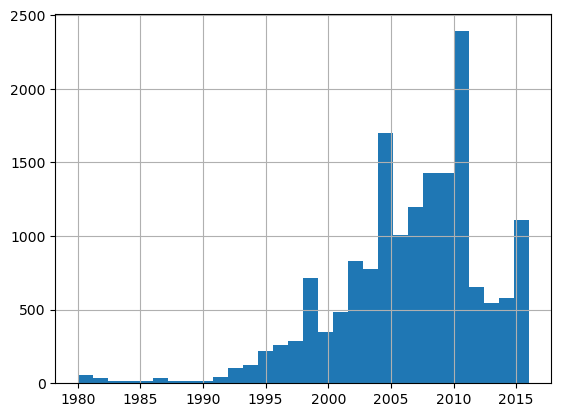

In [32]:
df['year_of_release'].hist(bins=30) #–ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –ø—Ä–µ–¥–ª–∞–≥–∞—é –≤—ã–∫–∏–Ω—É—Ç—å –≤—Å–µ –∏–≥—Ä—ã –¥–æ 1993 –≥–æ–¥–∞

In [33]:
df = df.query ('year_of_release >=1993')

<Axes: >

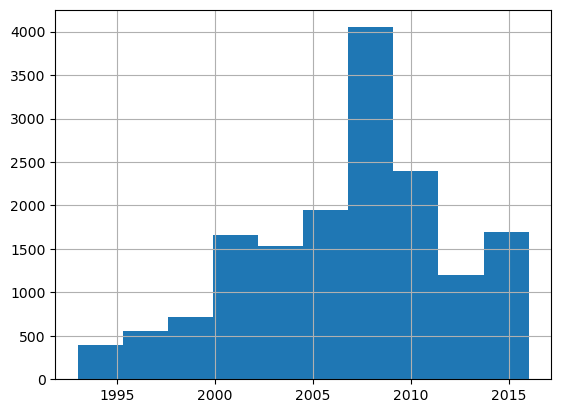

In [34]:
df['year_of_release'].hist()

In [35]:
df.isnull().sum() 
#–≤—ã–∫–∏–Ω—É–ª–∏ —Å—Ç–∞—Ä—ã–µ –≥–æ–¥–∞, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Å–æ–∫—Ä–∞—Ç–∏–ª–æ—Å—å, –∑–Ω–∞—á–∏—Ç –æ—Å–Ω–æ–≤–Ω—É—é –º–∞—Å—Å—É –ø—Ä–æ–±–ª–µ–º –Ω–µ—Å—É—Ç –±–æ–ª–µ–µ —Å—Ç–∞—Ä—ã–µ –ø–æ–∑–∏—Ü–∏–∏

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8159
user_score         8679
rating                0
total_sales           0
dtype: int64

In [36]:
df['rating'].unique() #—Å—Ç–∞—Ä—ã–π —Ä–µ–π—Ç–∏–Ω–≥ –æ—Å—Ç–∞–ª—Å—è, –≤–æ–∑–º–æ–∂–Ω–æ,  –≤ –±—É–¥—É—â–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –±—É–¥–µ—Ç –µ–≥–æ –∑–∞–º–µ–Ω–∏—Ç—å

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

–®–∞–≥ 3. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

‚Ä¢	–ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, —Å–∫–æ–ª—å–∫–æ –∏–≥—Ä –≤—ã–ø—É—Å–∫–∞–ª–æ—Å—å –≤ —Ä–∞–∑–Ω—ã–µ –≥–æ–¥—ã. –í–∞–∂–Ω—ã –ª–∏ –¥–∞–Ω–Ω—ã–µ –∑–∞ –≤—Å–µ –ø–µ—Ä–∏–æ–¥—ã

In [37]:
df.groupby('year_of_release')['year_of_release'].count() #–≤ —Ü–∏—Ñ—Ä–æ–≤–æ–º –∑–Ω–∞—á–µ–Ω–∏–∏ –æ—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –∏–≥—Ä –≤—ã—à–ª–∞ –≤ 2008-2010 –≥–æ–¥–∞, 
#–¥–∞–ª–µ–µ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å–ø–∞–¥ –≤ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö
#–≤ 93 –≥–æ–¥—É –∏–≥—Ä –±—ã–ª–æ –≤—ã–ø—É—â–µ–Ω–æ –≤—Å–µ–≥–æ 60 –∏–≥—Ä, –≤ 2002 –≥–æ–¥—É –±—ã–ª–æ —É–¥–≤–æ–µ–Ω–∏–µ –∏–≥—Ä –Ω–∞ —Ñ–æ–Ω–µ 2001 –≥–æ–¥–∞.
#–∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –±—ã–ª–∞ –∏–¥–µ—è —Å–¥–µ–ª–∞—Ç—å —Å—Ä–∞–∑—É —Å—Ä–µ–∑ –ø–æ 2002 –≥–æ–¥—É, –Ω–æ —Ç–æ–≥–¥–∞ –±—É–¥–µ—Ç —Å–ª–æ–∂–Ω–æ –ø–æ–Ω—è—Ç—å —Å—Ä–µ–¥–Ω—é—é –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∂–∏–∑–Ω–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã

year_of_release
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

<Axes: xlabel='year_of_release'>

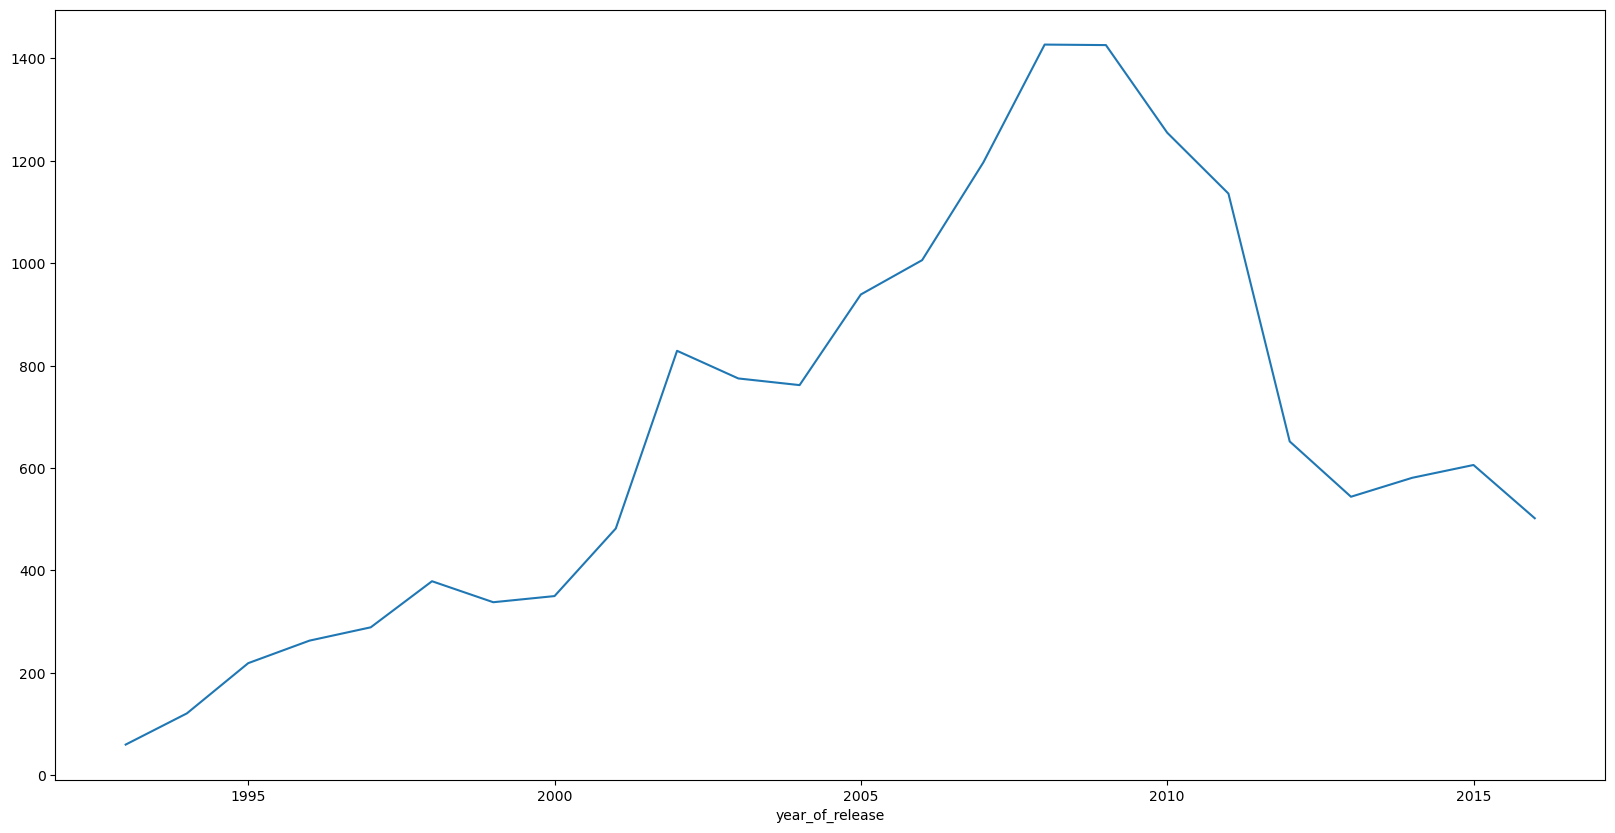

In [38]:
df.groupby('year_of_release')['year_of_release'].count().plot(kind='line', figsize=[20, 10])

‚Ä¢	–ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –∫–∞–∫ –º–µ–Ω—è–ª–∏—Å—å –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º. 
–í—ã–±–µ—Ä–∏—Ç–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º–∏ —Å—É–º–º–∞—Ä–Ω—ã–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏ –∏ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≥–æ–¥–∞–º. 
–ó–∞ –∫–∞–∫–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã–π —Å—Ä–æ–∫ –ø–æ—è–≤–ª—è—é—Ç—Å—è –Ω–æ–≤—ã–µ –∏ –∏—Å—á–µ–∑–∞—é—Ç —Å—Ç–∞—Ä—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã?

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –ø—Ä–æ–¥–∞–∂–∏ –∑–∞–≤–∏—Å—è—Ç –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º


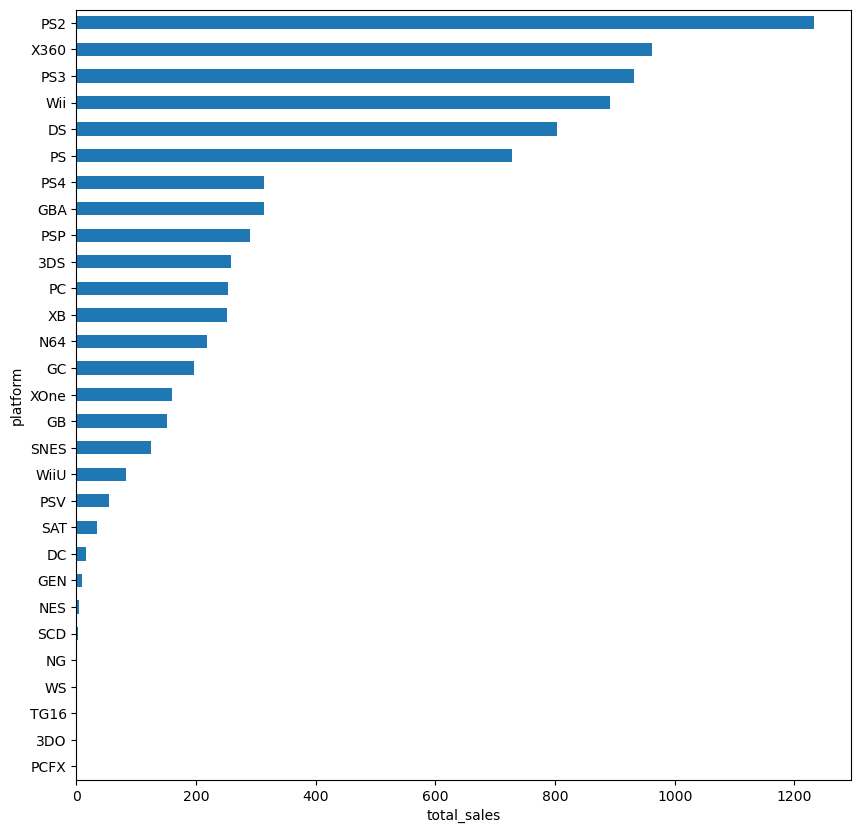

In [39]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(10,10))
plt.xlabel('total_sales'); #–æ—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –∏–≥—Ä –ø–æ –ø—Ä–æ–¥–∞–∂–∞–º —ç—Ç–æ –¥–ª—è PS2 –∏ X360

In [40]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False) #–ø–æ—Å–º–æ—Ç—Ä–∏–º –≤ —Ü–∏—Ñ—Ä–∞—Ö

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES     124.69
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.78
NES        3.72
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

–ø–æ—Å—Ç—Ä–æ–∏–º –∫—Ä–∞—Å–∏–≤—ã–π –≥—Ä–∞—Ñ–∏–∫, –∑–∞–æ–¥–Ω–æ –≤—Å–ø–æ–º–Ω–∏–º seaborn 

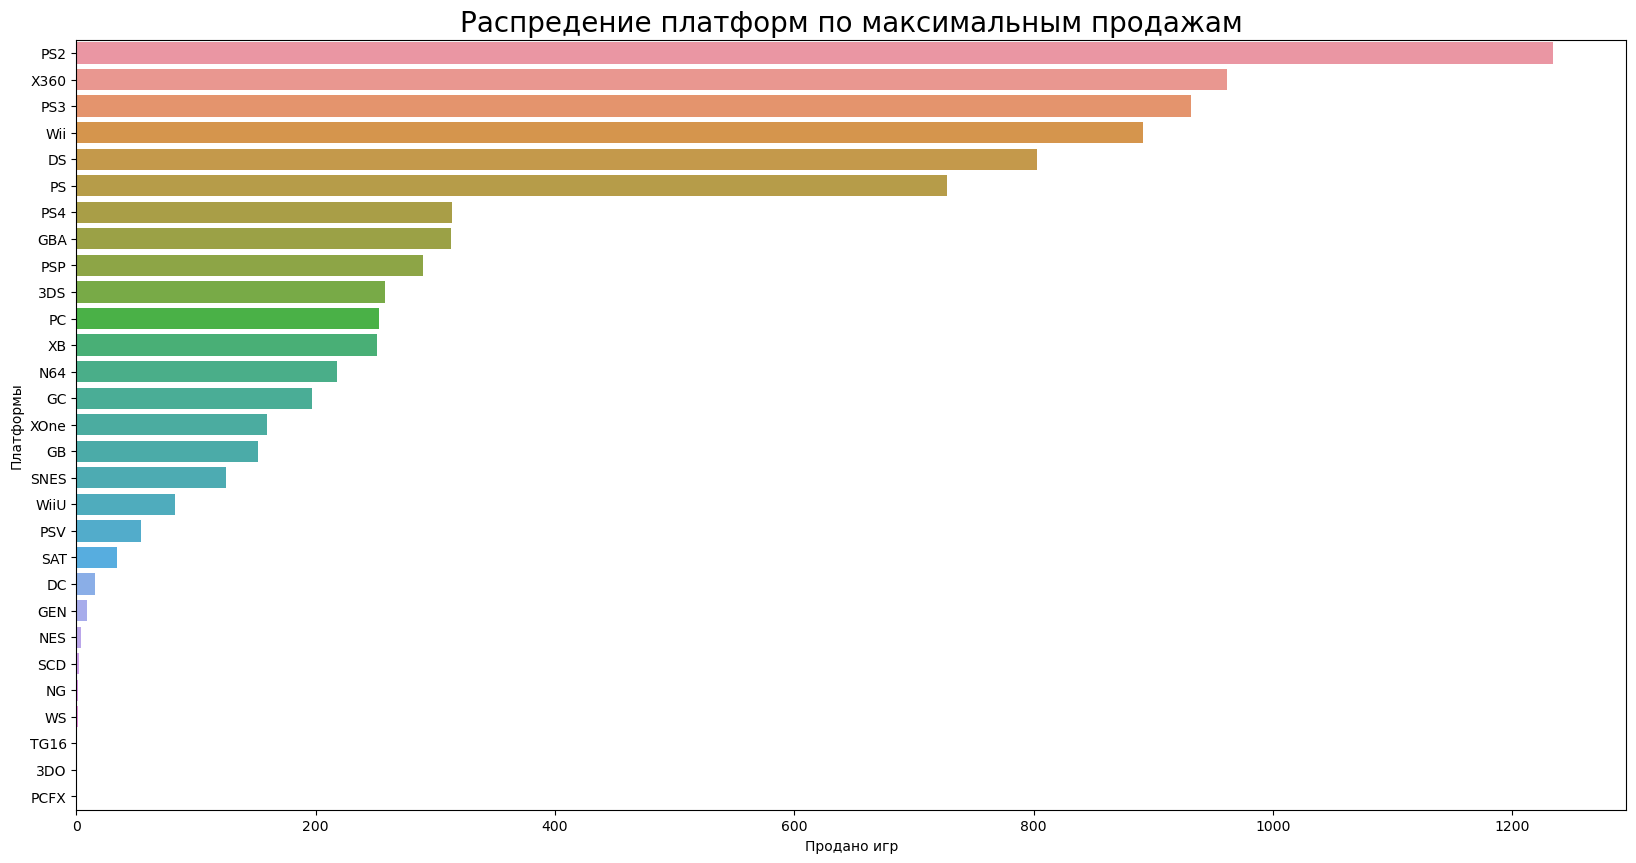

In [41]:
all_platforms = df.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')\
.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20,10))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–Ω–∏–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º –ø–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –ø—Ä–æ–¥–∞–∂–∞–º', fontsize=20)
sb.barplot(y=all_platforms.index, x=all_platforms.total_sales)
plt.ylabel('–ü–ª–∞—Ç—Ñ–æ—Ä–º—ã')
plt.xlabel('–ü—Ä–æ–¥–∞–Ω–æ –∏–≥—Ä');

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≥–æ–¥–∞–º

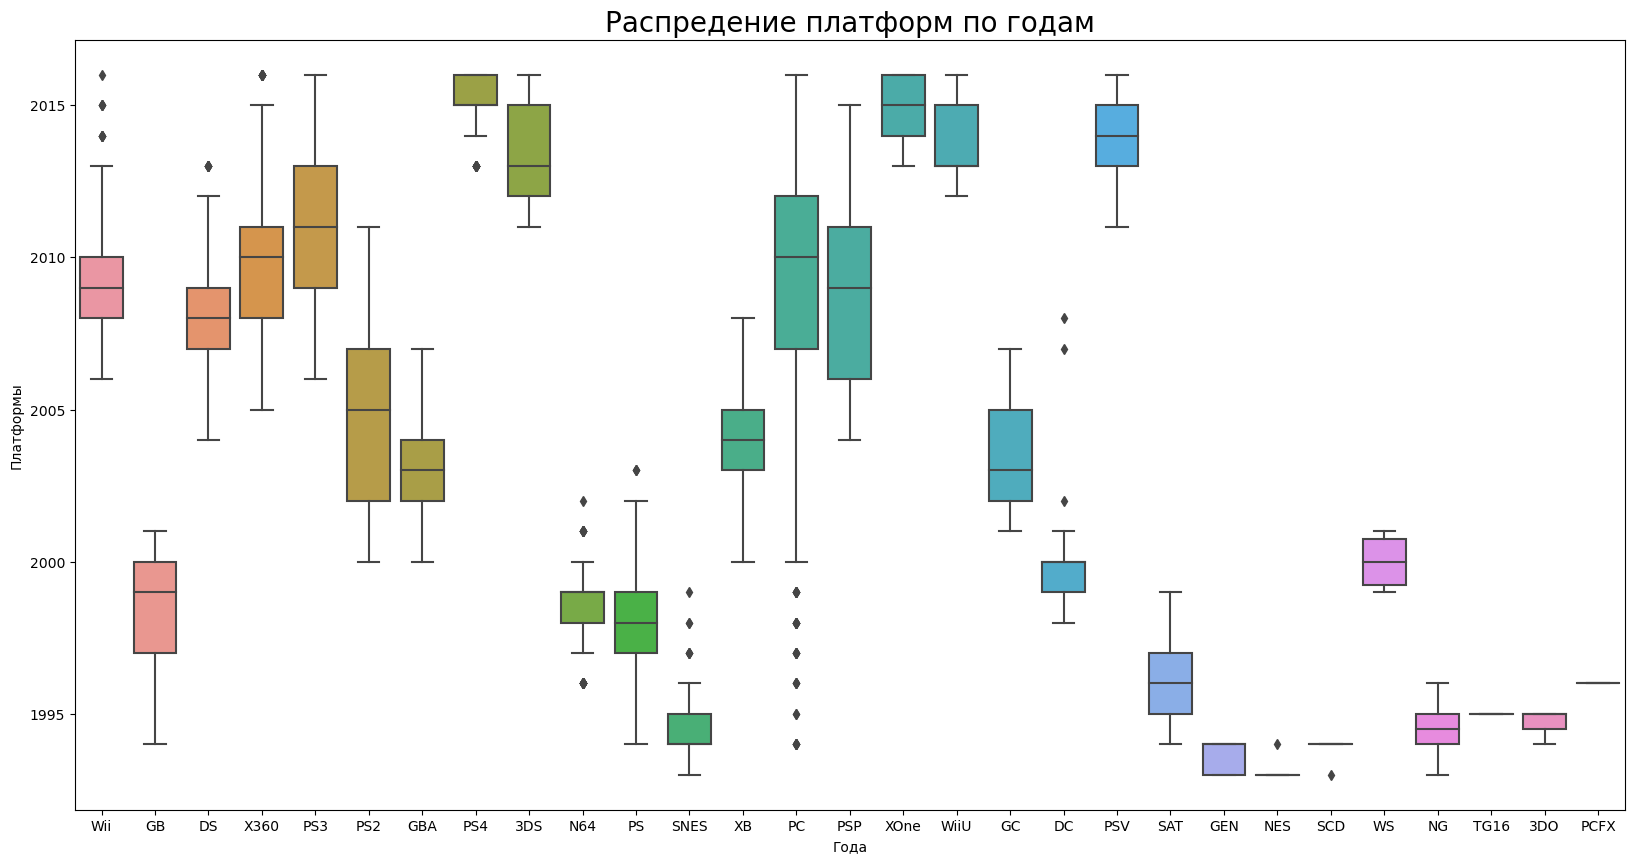

In [42]:
plt.figure(figsize=(20,10))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–Ω–∏–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º –ø–æ –≥–æ–¥–∞–º', fontsize=20)
sb.boxplot(y=df['year_of_release'], x=df['platform'])
plt.ylabel('–ü–ª–∞—Ç—Ñ–æ—Ä–º—ã')
plt.xlabel('–ì–æ–¥–∞');

–ü–µ—Ä–≤—ã–µ –≤—ã–≤–æ–¥—ã, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, —ç—Ç–æ –∫–∞–∂–¥–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ –∏–º–µ–µ—Ç —Å–≤–æ–π —Å—Ä–æ–∫ –∂–∏–∑–Ω–∏, –∫—Ä–æ–º–µ PC, –∏–≥—Ä—ã –Ω–∞ –Ω–µ–≥–æ –Ω–∞—á–∞–ª–∏ –∞–∫—Ç–∏–≤–Ω–æ –≤—ã—Ö–æ–¥–∏—Ç—å –ø—Ä–∏–º–µ—Ä–Ω–æ —Å 2000 –≥–æ–¥–∞, –¥–∞–ª–µ–µ —á–∞—â–µ –∏ —á–∞—â–µ. –¢–∞–∫ –∂–µ –µ—Å–ª–∏ —Å–∞–º–∞—è –º–∞—Å—Å–æ–≤–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ –±—ã–ª–∞ PS2, —Ç–æ —Å 2014 –∏–≥—Ä—ã –Ω–∞ –Ω–µ—ë –ø–µ—Ä–µ—Å—Ç–∞–ª–∏ –≤—ã—Ö–æ–¥–∏—Ç—å, –ø—Ä–æ–∏–∑–æ—à–ª–∞ —Å–º–µ–Ω–∞ –ø–æ–∫–æ–ª–µ–Ω–∏–π. –ò–≥—Ä—ã –Ω–∞ PS4 —Ç–æ–ª—å–∫–æ –Ω–∞—á–∞–ª–∏ –≤—ã—Ö–æ–¥–∏—Ç—å, –∫–∞–∫ –∏ –Ω–∞ XOne

–ó–∞ –∫–∞–∫–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã–π —Å—Ä–æ–∫ –ø–æ—è–≤–ª—è—é—Ç—Å—è –Ω–æ–≤—ã–µ –∏ –∏—Å—á–µ–∑–∞—é—Ç —Å—Ç–∞—Ä—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã?

In [43]:
df1 = df.pivot_table(index=['platform'], values='year_of_release', aggfunc=['min','max'])
#—Å–æ–∑–¥–∞–¥–∏–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, —á—Ç–æ–± –Ω–µ –ª–æ–º–∞—Ç—å –æ—Å–Ω–æ–≤–Ω–æ–π –º–∞—Å—Å–∏–≤
df1['max_min']= df1['max']- df1['min']
display ('–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –∂–∏–∑–Ω–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –ø–æ –º–µ–¥–∏–∞–Ω–µ',df1['max_min'].median())
display ('–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –∂–∏–∑–Ω–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –ø–æ —Å—Ä–µ–¥–Ω–µ–π',df1['max_min'].mean())

'–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –∂–∏–∑–Ω–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –ø–æ –º–µ–¥–∏–∞–Ω–µ'

6.0

'–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –∂–∏–∑–Ω–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –ø–æ —Å—Ä–µ–¥–Ω–µ–π'

6.103448275862069

‚Ä¢	–í–æ–∑—å–º–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ –∑–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –∞–∫—Ç—É–∞–ª—å–Ω—ã–π –ø–µ—Ä–∏–æ–¥. –ê–∫—Ç—É–∞–ª—å–Ω—ã–π –ø–µ—Ä–∏–æ–¥ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –≤–æ–ø—Ä–æ—Å–æ–≤. –û—Å–Ω–æ–≤–Ω–æ–π —Ñ–∞–∫—Ç–æ—Ä ‚Äî —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –ø–æ–º–æ–≥—É—Ç –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 2017 –≥–æ–¥.

In [44]:
df1

min             max max_min
         year_of_release year_of_release        
platform                                        
3DO                 1994            1995       1
3DS                 2011            2016       5
DC                  1998            2008      10
DS                  2004            2013       9
GB                  1994            2001       7
GBA                 2000            2007       7
GC                  2001            2007       6
GEN                 1993            1994       1
N64                 1996            2002       6
NES                 1993            1994       1
NG                  1993            1996       3
PC                  1994            2016      22
PCFX                1996            1996       0
PS                  1994            2003       9
PS2                 2000            2011      11
PS3                 2006            2016      10
PS4                 2013            2016       3
PSP                 2004            2015      11
PSV                 2011            2016       5
SAT                 1994            1999       5
SCD                 1993            1994       1
SNES                1993            1999       6
TG16                1995            1995       0
WS                  1999            2001       2
Wii                 2006            2016      10
WiiU                2012            2016       4
X360                2005            2016      11
XB                  2000            2008       8
XOne                2013            2016       3

–ß—Ç–æ —Å–∞–º–æ–µ –≤–∞–∂–Ω–æ–µ –º—ã –º–æ–∂–µ–º –ø–æ–ª—É—á–∏—Ç—å –∏–∑ –¥–∞–Ω–Ω—ã—Ö –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –∏ —Ç–∞–±–ª–∏—Ü—ã df1 - —Å–∞–º–∞—è –ø—Ä–∏–±—ã–ª—å–Ω–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ PS2, DS –∏–¥—É—Ç –Ω–∞ –ø–µ–Ω—Å–∏—é, —Ç–∞–∫ –∫–∞–∫ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –Ω–∞ 2017 –≥–æ–¥ –æ–Ω–∏ –Ω–µ –∞–∫—Ç—É–∞–ª—å–Ω—ã, –∏–≥—Ä—ã –Ω–∞ –Ω–∏—Ö –Ω–µ –≤—ã—Ö–æ–¥—è—Ç, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –Ω–∞–¥–æ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å —Ç–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –∏–≥—Ä—ã –µ—â—ë –≤—ã—Ö–æ–¥—è—Ç, –≤–∑—è—Ç—å –∞–∫—Ç—É–∞–ª—å–Ω—ã–µ –≥–æ–¥–∞. –î–ª—è –¥–∞–ª—å–Ω–µ–π—à–∏—Ö –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–π –≤–æ–∑—å–º–µ–º –¥–∞–Ω–Ω—ã–µ –æ—Ç 2015 –≥–æ–¥–∞

In [45]:
df_2015 = df.query ('year_of_release >=2015')

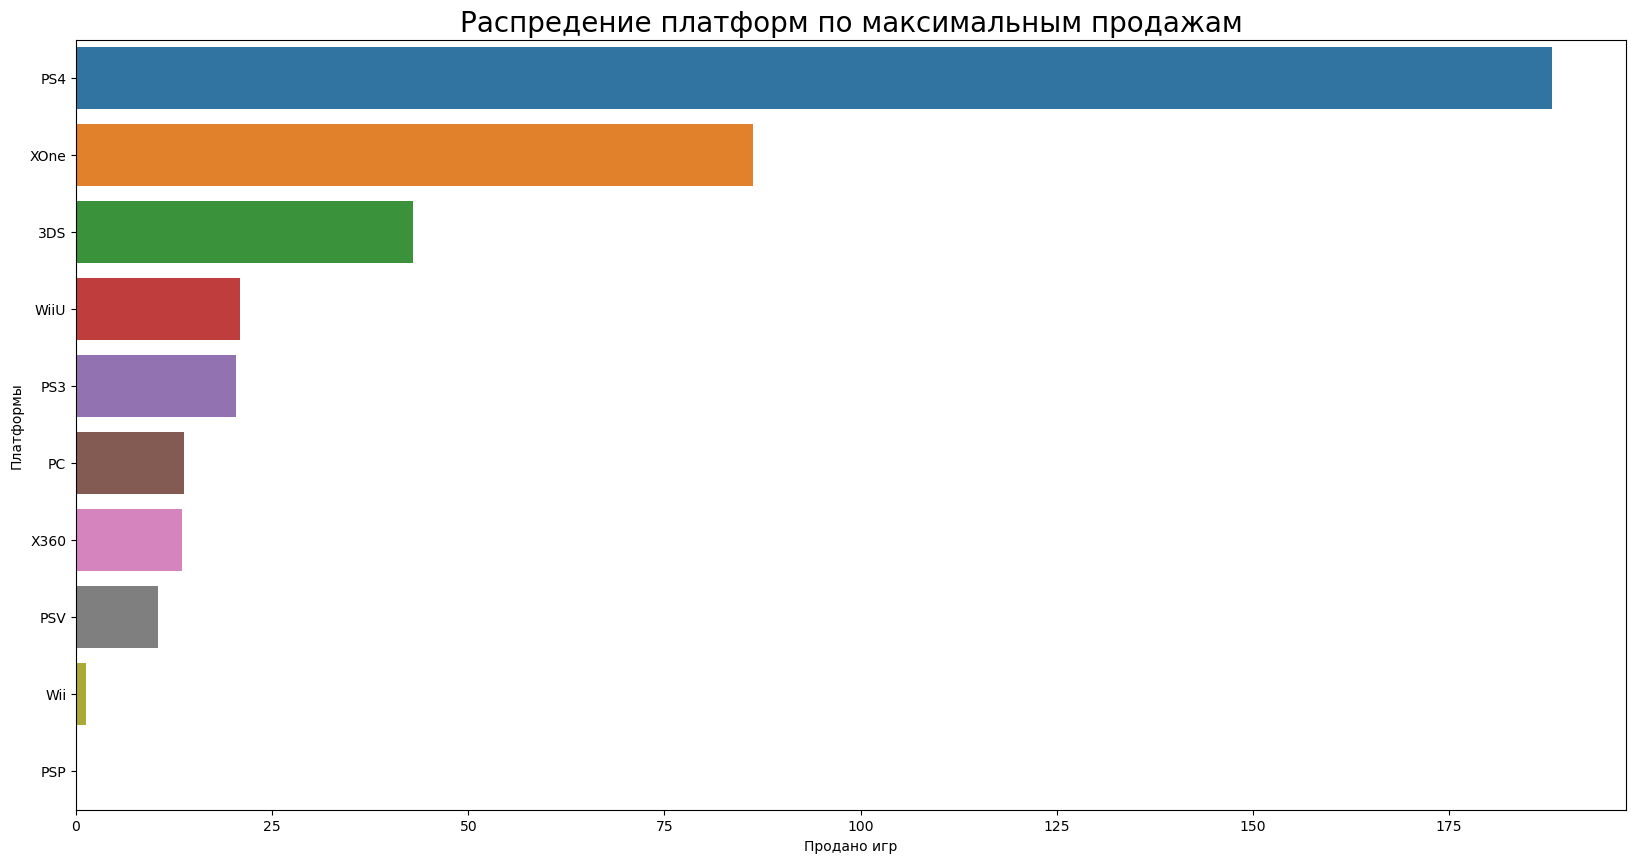

In [46]:
all_platforms1 = df_2015.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')\
.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20,10))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–Ω–∏–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º –ø–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –ø—Ä–æ–¥–∞–∂–∞–º', fontsize=20)
sb.barplot(y=all_platforms1.index, x=all_platforms1.total_sales)
plt.ylabel('–ü–ª–∞—Ç—Ñ–æ—Ä–º—ã')
plt.xlabel('–ü—Ä–æ–¥–∞–Ω–æ –∏–≥—Ä');

–∞ –µ—Å–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –Ω–∞ —á—Ç–æ –Ω–µ –≤—ã—Ö–æ–¥–∏–ª–æ –∏–≥—Ä —É–∂–µ –≤ 2016 –≥–æ–¥—É

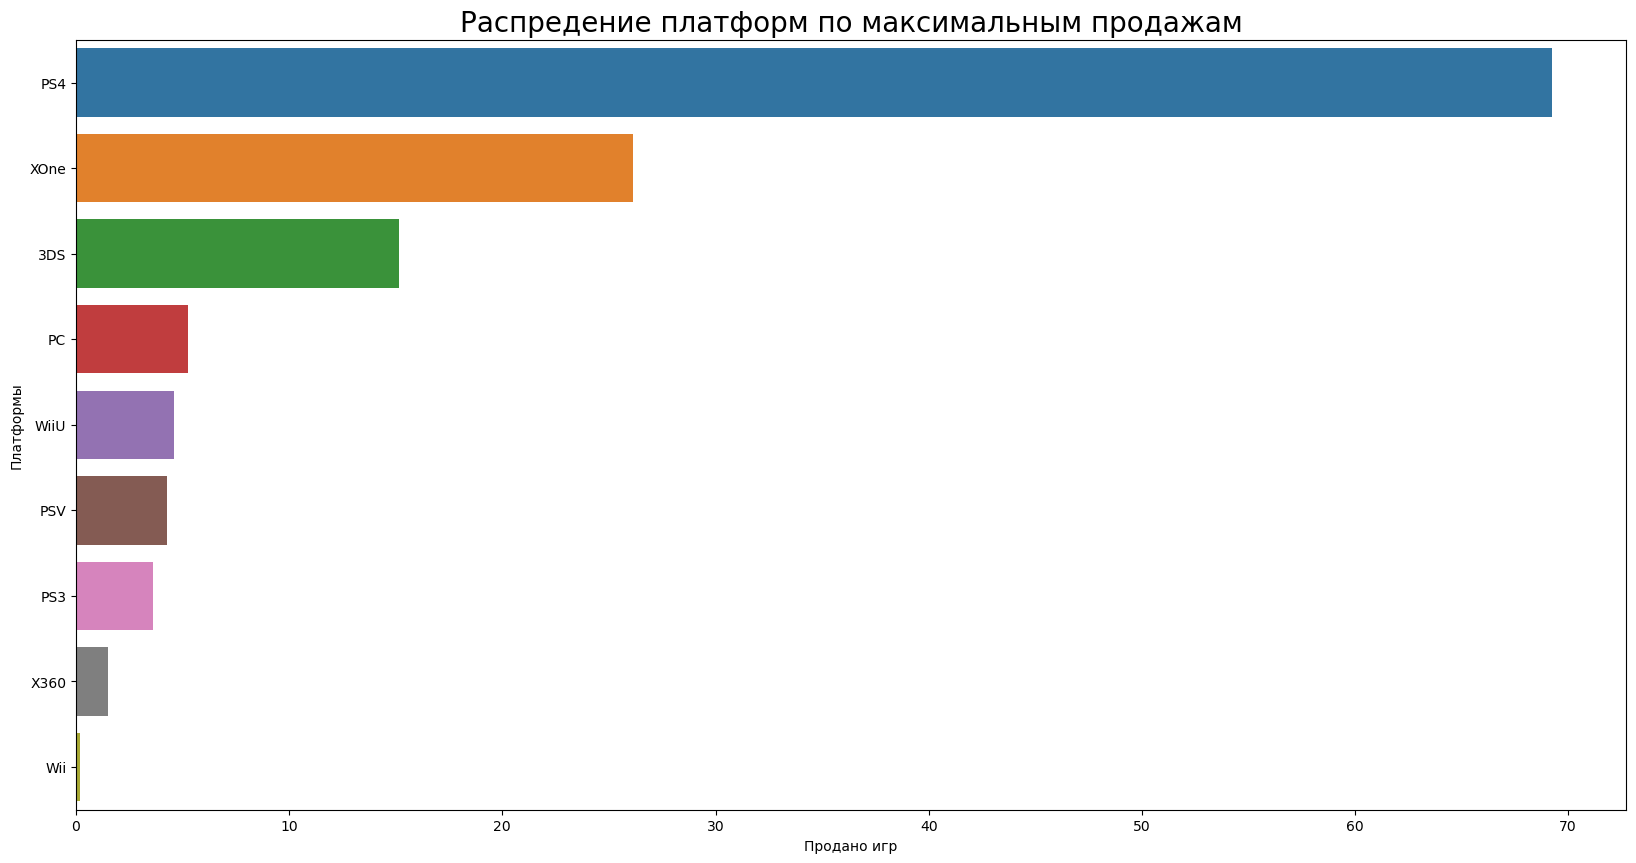

In [47]:
df3 = df.query ('year_of_release >=2016')
all_platforms1 = df3.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')\
.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20,10))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–Ω–∏–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º –ø–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –ø—Ä–æ–¥–∞–∂–∞–º', fontsize=20)
sb.barplot(y=all_platforms1.index, x=all_platforms1.total_sales)
plt.ylabel('–ü–ª–∞—Ç—Ñ–æ—Ä–º—ã')
plt.xlabel('–ü—Ä–æ–¥–∞–Ω–æ –∏–≥—Ä');

- PS4, XOne, 3DS, PC –æ—Å—Ç–∞–≤–ª—è–µ–º, 
- PC –æ—Å—Ç–∞–≤–ª—è–µ–º, —Ç–∞–∫ –∫–∞–∫ –∏–≥—Ä—ã –Ω–∞ –Ω–µ–≥–æ –≤—ã—Ö–æ–¥—è—Ç —É–∂–µ 22 –≥–æ–¥–∞, –æ–Ω –∞–Ω–∞–º–∞–ª–∏—è –Ω–∞ —Ñ–æ–Ω–µ –¥—Ä—É–≥–∏—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º, –ø–æ—ç—Ç–æ–º—É –Ω–µ –≤–∏–∂—É —Å–º—ã—Å–ª–∞ –µ–≥–æ –≤—ã–∫–∏–¥—ã–≤–∞—Ç—å. –ü—Ä–∏ —ç—Ç–æ–º —É –Ω–µ–≥–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä —á—Ç–æ –≤ 2015 –≥–æ–¥—É, —á—Ç–æ –≤ 2016 –≥–æ–¥—É
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –Ω–∞ PS3 –∏ X360 –∑–∞ 1 –≥–æ–¥ —Å–æ–∫—Ä–∞—Ç–∏–ª–æ—Å—å –≤ 2 —Ä–∞–∑–∞, —Å —É—á–µ—Ç–æ–º —Å—Ä–µ–¥–Ω–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã - —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –µ—Å—Ç—å —Å–º—ã—Å–ª –≤—ã–∫–∏–Ω—É—Ç—å.
- WiiU, –ø–µ—Ä–≤–∞—è –∏–≥—Ä–∞ –Ω–∞ —ç—Ç—É –ø–ª–∞—Ç—Ñ–æ—Ä–º—É –≤ 2011 –≥–æ–¥—É, –≤ 2017 –≥–æ–¥—É —Å —É—á–µ—Ç–æ–º –º–µ–¥–∏–∞–Ω—ã, –¥–∞–Ω–Ω–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ –µ—â—ë –±—É–¥–µ—Ç –∂–∏–≤–∞—è, –ø–æ—ç—Ç–æ–º—É –µ—ë —Ç–∞–∫ –∂–µ –µ—Å—Ç—å —Å–º—ã—Å–ª –æ—Å—Ç–∞–≤–∏—Ç—å, –Ω–æ –µ—ë –ø—Ä–æ–¥–∞–∂–∏ —Å–∏–ª—å–Ω–æ –ø–∞–¥–∞—é—Ç, —Ö–æ—Ä–æ—à–æ –±—ã –∏–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ —Ç–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏, –∞ –Ω–µ –≤–∏–∫–∏–ø–µ–¥–∏–∏ 2022 –≥–æ–¥–∞, –ø–æ–ª—É—á–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ —ç—Ç–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ, —á—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç, –ø–æ—á–µ–º—É –Ω–µ –Ω–∞—Å—Ç–æ–ª—å–∫–æ —Å—Ç–∞—Ä–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ –≤ 2016 –≥–æ–¥—É –≤—ã–ø—É—Å—Ç–∏–ª–∞ –≤ 2 —Ä–∞–∑–∞ –º–µ–Ω—å—à–µ –∏–≥—Ä, —á–µ–º –≤ 2015 –≥–æ–¥—É, —á—Ç–æ –ø—Ä–æ–∏–∑–æ—à–ª–æ, –∫–∞–∫–æ–π –Ω–æ–≤–æ—Å—Ç–Ω–æ–π —Ñ–æ–Ω –ø–æ —ç—Ç–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ. 
- PSV, —Ç—Ä–µ–±—É–µ—Ç—Å—è –±–æ–ª—å—à–µ –¥–∞–Ω–Ω—ã—Ö –æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ, —á—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç, –∫–∞–∫–∏–µ –ø–ª–∞–Ω—ã –∏ –µ—Å—Ç—å –ª–∏ –∏–¥–µ–∏ –ø–æ –µ—ë –∑–∞–º–µ–Ω–µ.

‚Ä¢	–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ ¬´—è—â–∏–∫ —Å —É—Å–∞–º–∏¬ª –ø–æ –≥–ª–æ–±–∞–ª—å–Ω—ã–º –ø—Ä–æ–¥–∞–∂–∞–º –∏–≥—Ä –≤ —Ä–∞–∑–±–∏–≤–∫–µ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º. –û–ø–∏—à–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

In [48]:
#—è —Ç–∞–∫ –ø–æ–Ω–∏–º–∞—é, —á—Ç–æ –¥–∞–ª—å—à–µ –Ω–∞–¥–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—å –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Ö –¥–∞–Ω–Ω—ã—Ö, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö —Ä–µ—à–∏–ª –¥–µ–ª–∞—Ç—å –∞–Ω–∞–ª–∏–∑ –¥–ª—è 2017 –≥–æ–¥–∞
#—Å–æ–∑–¥–∞–ª –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ df2 –∏ df3, —á—Ç–æ–± –ø–æ—Ç–æ–º –º–µ–Ω—å—à–µ –ø–µ—Ä–µ–¥–µ–ª—ã–≤–∞—Ç—å...

(0.0, 1.0)

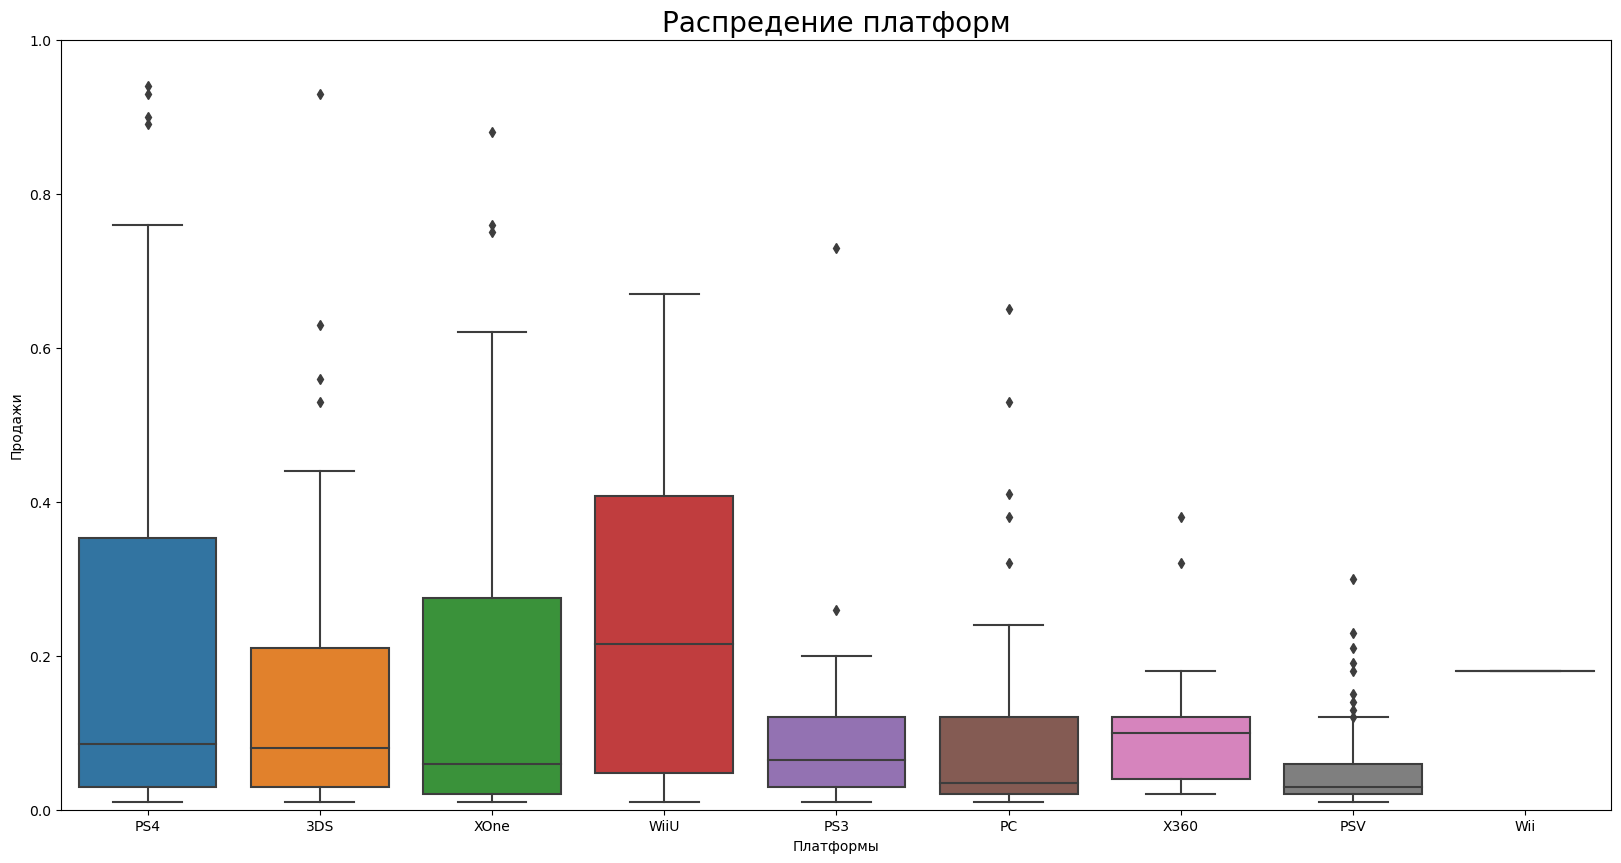

In [49]:
plt.figure(figsize=(20,10))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–Ω–∏–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º', fontsize=20)
sb.boxplot(y=df3['total_sales'], x=df3['platform'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ü–ª–∞—Ç—Ñ–æ—Ä–º—ã');
plt.ylim(0, 1) #–Ω–∞—á–∏–Ω–∞–ª —Å 7–∫–∏, –¥–∞–ª—å—à–µ —Ä–µ–∑–∞–ª –≤—ã–±—Ä–æ—Å—ã, –æ—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–∞ PS4

(0.0, 0.6)

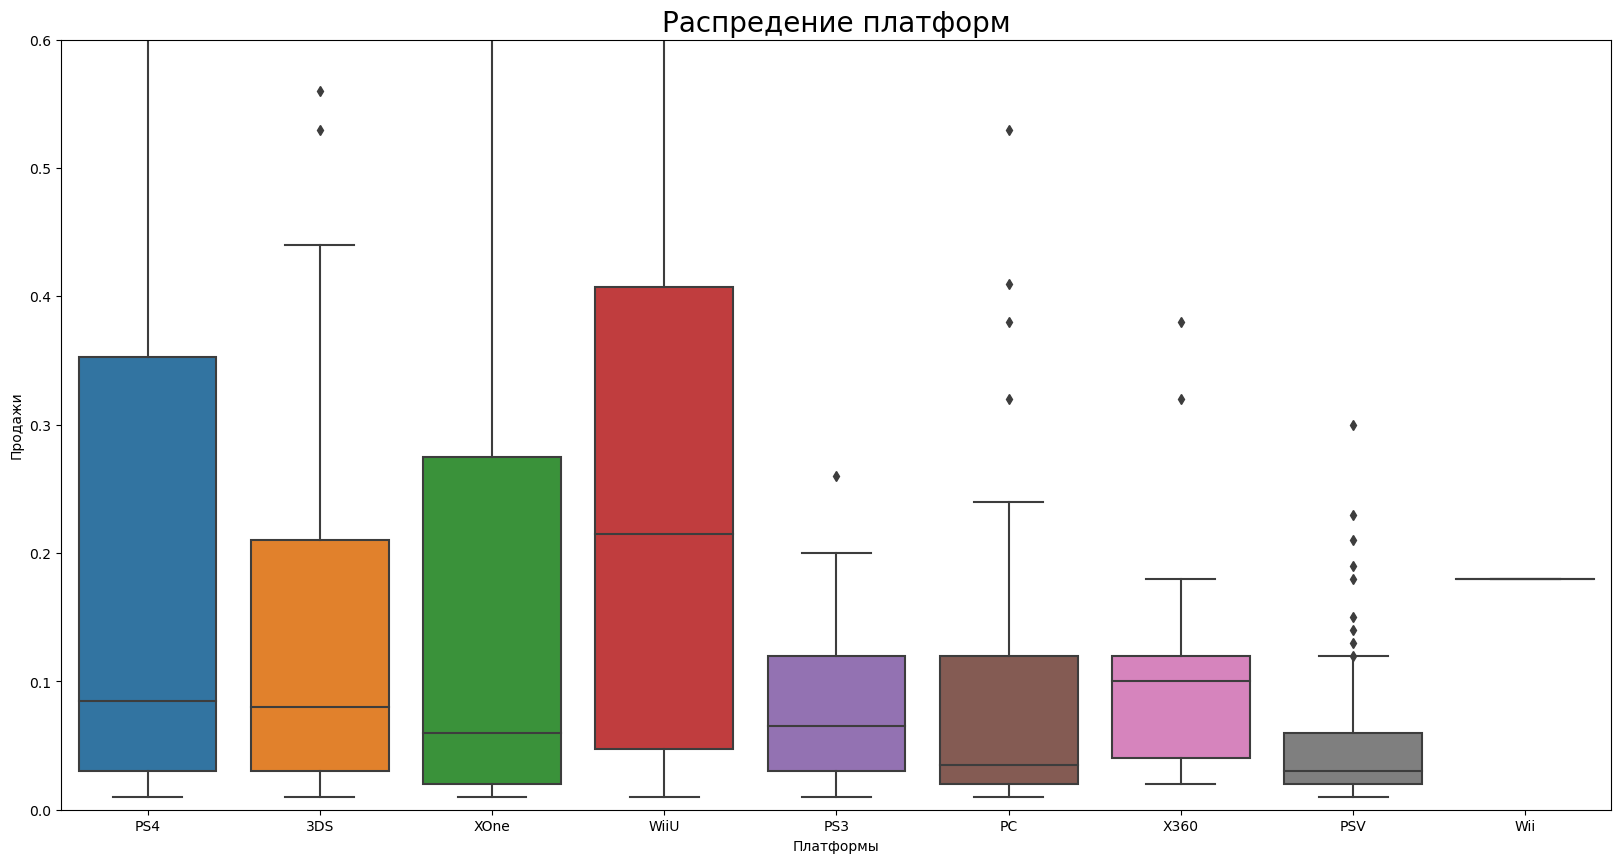

In [50]:
plt.figure(figsize=(20,10))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–Ω–∏–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º', fontsize=20)
sb.boxplot(y=df3['total_sales'], x=df3['platform'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ü–ª–∞—Ç—Ñ–æ—Ä–º—ã');
plt.ylim(0, 0.6) #–Ω–∞—á–∏–Ω–∞–ª —Å 7–∫–∏, –¥–∞–ª—å—à–µ —Ä–µ–∑–∞–ª –≤—ã–±—Ä–æ—Å—ã, –æ—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–∞ PS4

–£ PSV –º–Ω–æ–≥–æ –≤—ã–±—Ä–æ—Å–æ–≤, —Ç–∞–∫ —á—Ç–æ –ø–æ–∫–∏–¥–∞–µ—Ç –≥–æ–Ω–∫—É, –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ –æ—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ —Å–ª–µ–¥—É—é—â–∏–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã
PS4, XOne, 3DS, PC, WiiU

In [51]:
#–Ω–∞–ø–æ–º–∏–Ω–∞—é, —á—Ç–æ —É—Å–ª–æ–≤–Ω–æ —è –¥–µ–ª–∞—é –ø—Ä–æ–µ–∫—Ç –≤ 2016 –≥–æ–¥—É, –∫–æ–≥–¥–∞ –Ω–µ –∑–Ω–∞—é, —á—Ç–æ WiiU –±—É–¥–µ—Ç –∑–∞–∫—Ä—ã—Ç–∞ –≤ 2017 –≥–æ–¥—É

In [52]:
total_list = ['PS4', '3DS', 'XOne', 'WiiU', 'PC']
df_total = df3.query('platform in @total_list')
display (df_total)

name platform  \
94                                           FIFA 17      PS4   
108                                 Pokemon Sun/Moon      3DS   
171                       Uncharted 4: A Thief's End      PS4   
245                   Call of Duty: Infinite Warfare      PS4   
289                                    Battlefield 1      PS4   
...                                              ...      ...   
16645                                         ZombiU     XOne   
16652                               Fast Racing Neo      WiiU   
16660                               Prison Architect     XOne   
16672  Metal Gear Solid V: The Definitive Experience     XOne   
16677               Aikatsu Stars! My Special Appeal      3DS   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
94                2016        Sports      0.66      5.75      0.08   
108               2016  Role-Playing      2.98      1.45      2.26   
171               2016       Shooter      1.85      2.50      0.19   
245               2016       Shooter      1.61      2.00      0.15   
289               2016       Shooter      1.10      2.15      0.21   
...                ...           ...       ...       ...       ...   
16645             2016        Action      0.00      0.01      0.00   
16652             2016        Action      0.00      0.01      0.00   
16660             2016        Action      0.01      0.00      0.00   
16672             2016        Action      0.01      0.00      0.00   
16677             2016        Action      0.00      0.00      0.01   

       other_sales  critic_score  user_score   rating  total_sales  
94            1.11          85.0         5.0        E         7.60  
108           0.45           NaN         NaN  unknown         7.14  
171           0.85          93.0         7.9        T         5.39  
245           0.71          77.0         3.4        M         4.47  
289           0.61          88.0         8.4        M         4.07  
...            ...           ...         ...      ...          ...  
16645         0.00           NaN         NaN  unknown         0.01  
16652         0.00          81.0         8.5        E         0.01  
16660         0.00          74.0         6.7  unknown         0.01  
16672         0.00           NaN         NaN        M         0.01  
16677         0.00           NaN         NaN  unknown         0.01  

[365 rows x 12 columns]

‚Ä¢	–ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –∫–∞–∫ –≤–ª–∏—è—é—Ç –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –≤–Ω—É—Ç—Ä–∏ –æ–¥–Ω–æ–π –ø–æ–ø—É–ª—è—Ä–Ω–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –æ—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –∫—Ä–∏—Ç–∏–∫–æ–≤. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –¥–∏–∞–≥—Ä–∞–º–º—É —Ä–∞—Å—Å–µ—è–Ω–∏—è –∏ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É –æ—Ç–∑—ã–≤–∞–º–∏ –∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏. –°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–π—Ç–µ –≤—ã–≤–æ–¥—ã.

In [53]:
df_total.query ('platform == "PS4"').corr()

year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release              NaN       NaN       NaN       NaN          NaN   
na_sales                     NaN  1.000000  0.648559  0.334150     0.875858   
eu_sales                     NaN  0.648559  1.000000  0.272582     0.935094   
jp_sales                     NaN  0.334150  0.272582  1.000000     0.328254   
other_sales                  NaN  0.875858  0.935094  0.328254     1.000000   
critic_score                 NaN  0.401690  0.303289  0.359141     0.380222   
user_score                   NaN -0.123691 -0.117009  0.100665    -0.132005   
total_sales                  NaN  0.846728  0.951425  0.379156     0.996529   

                 critic_score  user_score  total_sales  
year_of_release           NaN         NaN          NaN  
na_sales             0.401690   -0.123691     0.846728  
eu_sales             0.303289   -0.117009     0.951425  
jp_sales             0.359141    0.100665     0.379156  
other_sales          0.380222   -0.132005     0.996529  
critic_score         1.000000    0.480147     0.375695  
user_score           0.480147    1.000000    -0.122461  
total_sales          0.375695   -0.122461     1.000000

In [54]:
df_total.query ('platform == "XOne"').corr() #–ø–æ –¢–ó –Ω–∞–¥–æ 1 —Å—Ç–æ–ª–±–∏–∫, –Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ —Å—Ä–∞–≤–Ω–∏—Ç—å –¥–≤–µ –æ—Å–Ω–æ–≤–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã 

year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release              NaN       NaN       NaN       NaN          NaN   
na_sales                     NaN  1.000000  0.581294  0.049094     0.963999   
eu_sales                     NaN  0.581294  1.000000  0.036686     0.771624   
jp_sales                     NaN  0.049094  0.036686  1.000000     0.055166   
other_sales                  NaN  0.963999  0.771624  0.055166     1.000000   
critic_score                 NaN  0.408434  0.307704  0.035043     0.425018   
user_score                   NaN -0.126506 -0.102326  0.016378    -0.128409   
total_sales                  NaN  0.910347  0.865892  0.051238     0.985306   

                 critic_score  user_score  total_sales  
year_of_release           NaN         NaN          NaN  
na_sales             0.408434   -0.126506     0.910347  
eu_sales             0.307704   -0.102326     0.865892  
jp_sales             0.035043    0.016378     0.051238  
other_sales          0.425018   -0.128409     0.985306  
critic_score         1.000000    0.426034     0.412005  
user_score           0.426034    1.000000    -0.130303  
total_sales          0.412005   -0.130303     1.000000

–î–ª—è PS4 –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥ –ø–æ –æ—Ç–∑—ã–≤–∞–º –Ω–∏–∂–µ, —á–µ–º –¥–ª—è XOne

In [55]:
df_total.corr() #–¥–ª—è –≤—Å–µ—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è

year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release              NaN       NaN       NaN       NaN          NaN   
na_sales                     NaN  1.000000  0.598169  0.432543     0.780451   
eu_sales                     NaN  0.598169  1.000000  0.186045     0.919590   
jp_sales                     NaN  0.432543  0.186045  1.000000     0.230850   
other_sales                  NaN  0.780451  0.919590  0.230850     1.000000   
critic_score                 NaN  0.340555  0.234310  0.171131     0.272790   
user_score                   NaN -0.069083 -0.062384  0.152591    -0.061996   
total_sales                  NaN  0.865289  0.896448  0.477543     0.941453   

                 critic_score  user_score  total_sales  
year_of_release           NaN         NaN          NaN  
na_sales             0.340555   -0.069083     0.865289  
eu_sales             0.234310   -0.062384     0.896448  
jp_sales             0.171131    0.152591     0.477543  
other_sales          0.272790   -0.061996     0.941453  
critic_score         1.000000    0.444343     0.304433  
user_score           0.444343    1.000000    -0.060222  
total_sales          0.304433   -0.060222     1.000000

–ö–æ—Ä—Ä–µ–ª–∏—è—Ü–∏ –º–µ–∂–¥—É –æ—Ç–∑—ã–≤–∞–º–∏ –∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏ 0.4, —á—Ç–æ —è–≤–ª—è–µ—Ç—Å—è, –ø–æ-–º–æ–µ–º—É, —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø–æ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π –≥—Ä–∞–Ω–∏—Ü–µ. –í —Ü–µ–ª–æ–º –ø–æ–∫—É–ø–∞–ª–∏ —Å–ª—É—à–∞–ª–∏ –æ—Ç–∑—ã–≤—ã, –Ω–æ –≤–æ—Ç –ø—Ä–∏—Å–ª—É—à–∏–≤–∞–ª–∏—Å—å –Ω–µ –≤—Å–µ–≥–¥–∞. 

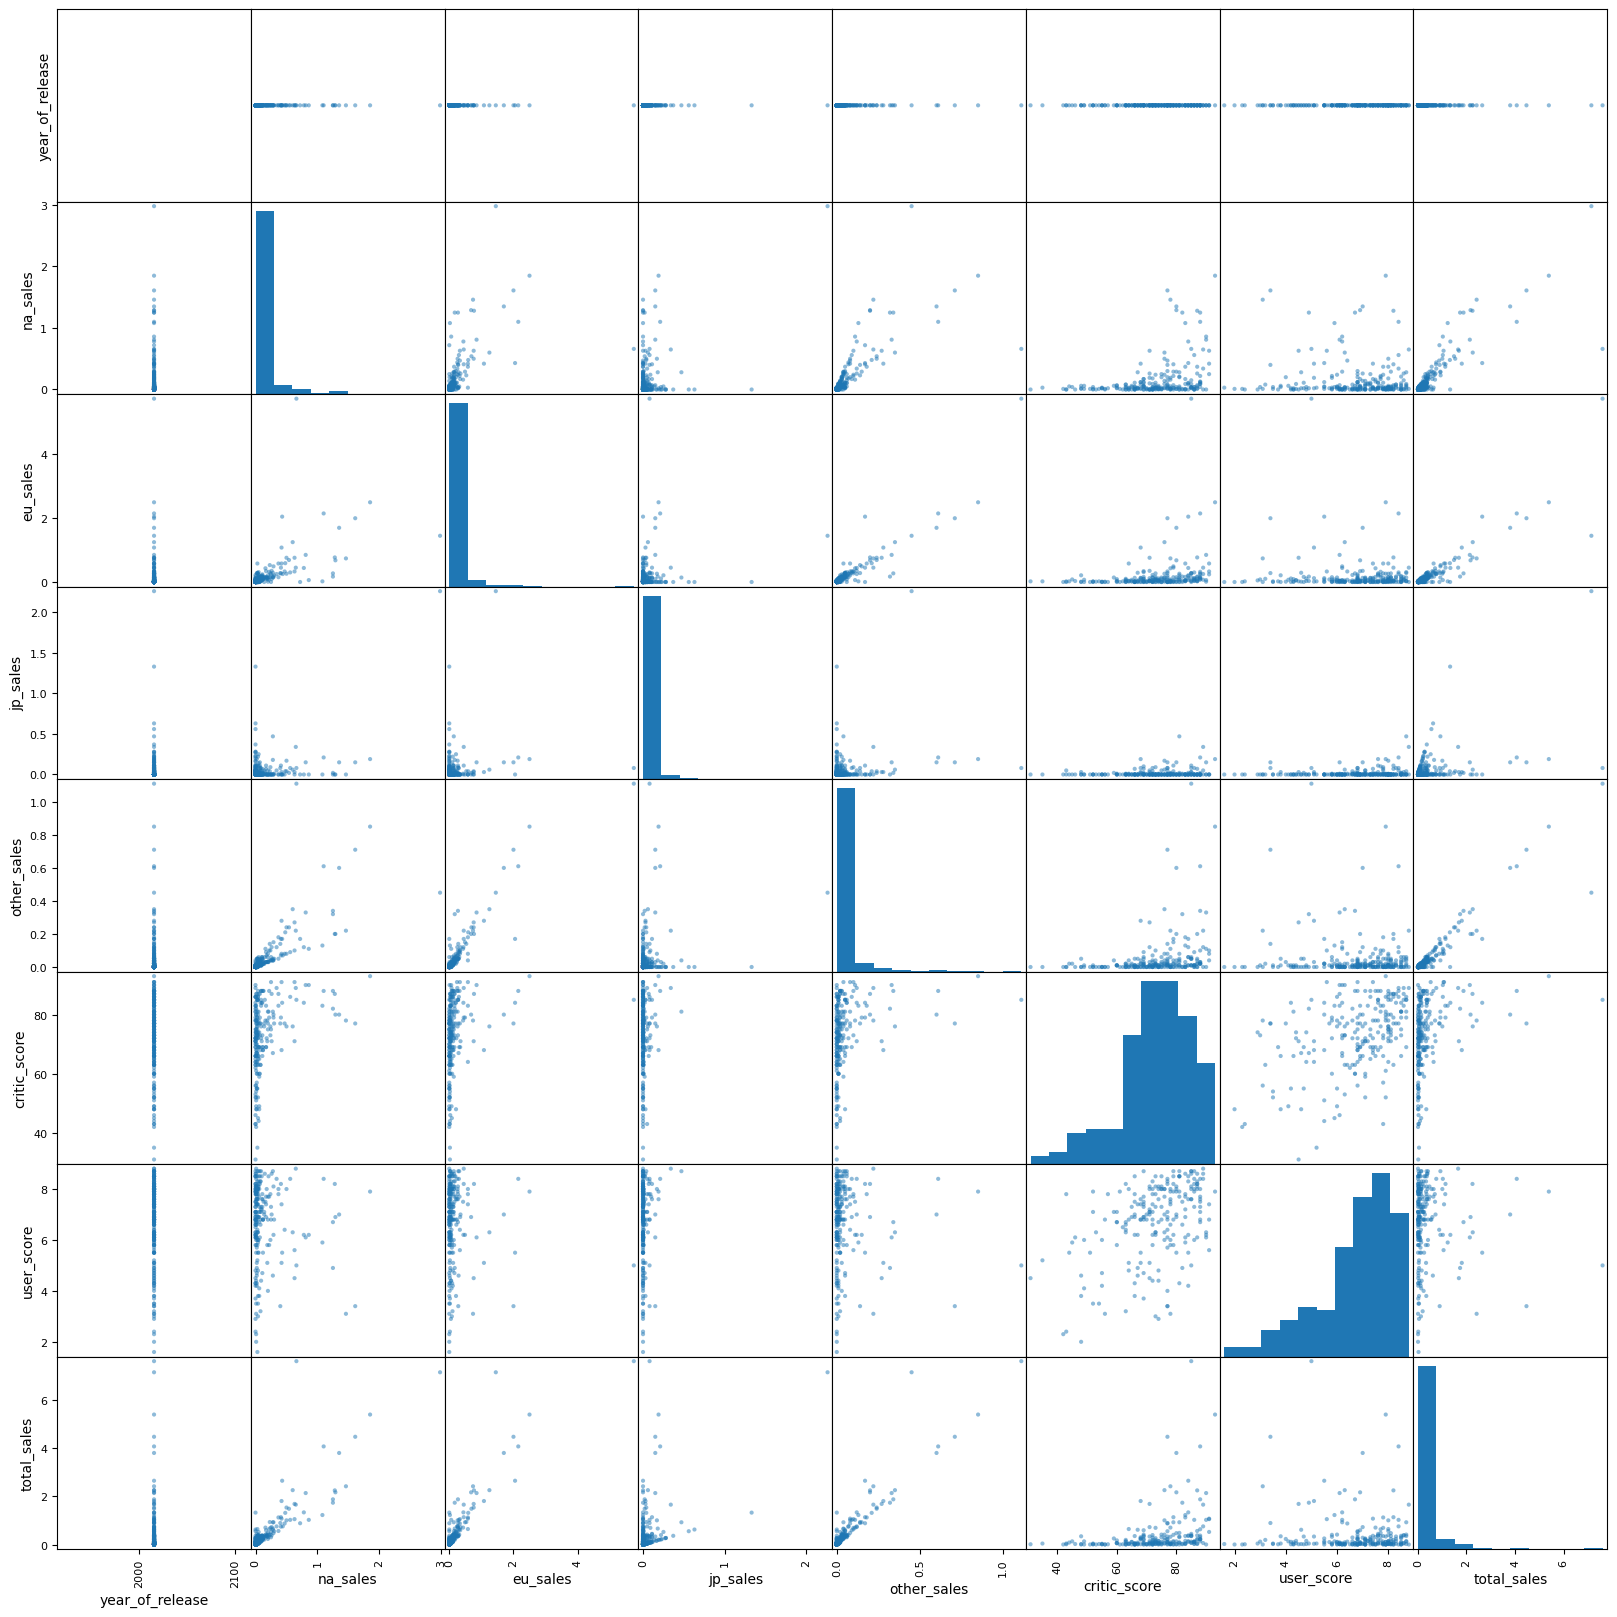

In [56]:
pd.plotting.scatter_matrix(df_total, figsize=(20, 20)) #–æ–±—â–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞
plt.show()

<Axes: xlabel='user_score', ylabel='total_sales'>

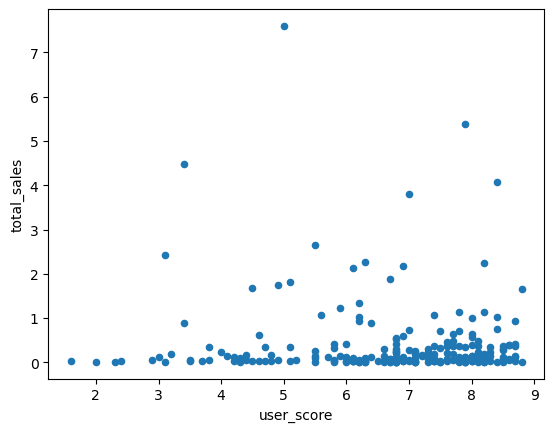

In [57]:
df_total.plot(x='user_score', y='total_sales', kind='scatter') 

<Axes: xlabel='critic_score', ylabel='total_sales'>

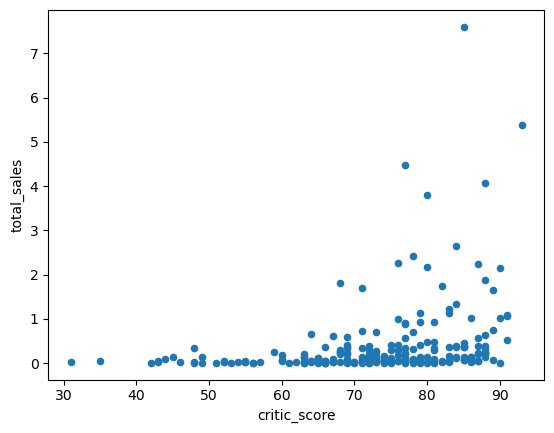

In [58]:
df_total.plot(x='critic_score', y='total_sales', kind='scatter')

–ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –±–æ–ª–µ–µ —Ö–∞–æ—Ç–∏—á–Ω—ã–π, –∞ –≤–æ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–µ–π—Ç–∏–Ω–≥–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤ –∏ –ø—Ä–æ–¥–∞–∂, —É–∂–µ –±–æ–ª–µ–µ –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è.

‚Ä¢	–ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –æ–±—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–≥—Ä –ø–æ –∂–∞–Ω—Ä–∞–º. –ß—Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –æ —Å–∞–º—ã—Ö –ø—Ä–∏–±—ã–ª—å–Ω—ã—Ö –∂–∞–Ω—Ä–∞—Ö? –í—ã–¥–µ–ª—è—é—Ç—Å—è –ª–∏ –∂–∞–Ω—Ä—ã —Å –≤—ã—Å–æ–∫–∏–º–∏ –∏ –Ω–∏–∑–∫–∏–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏?

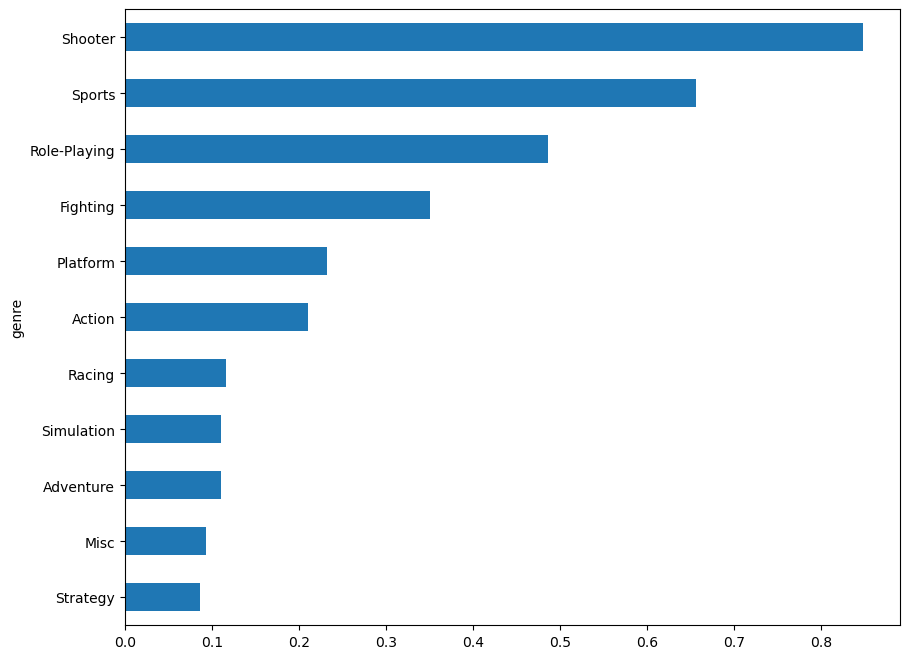

In [59]:
df_total.groupby('genre')['total_sales'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(10,8));

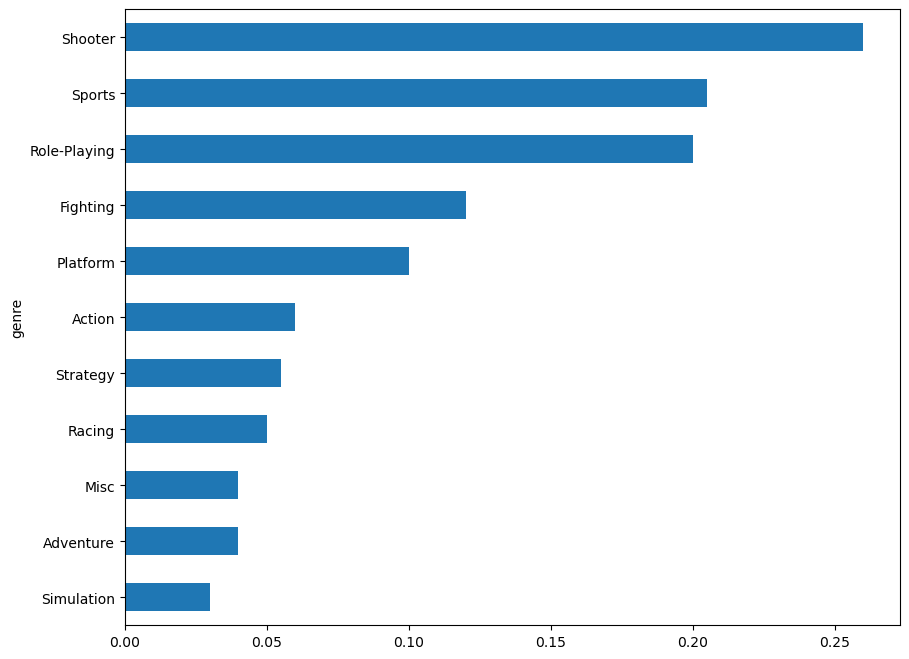

In [60]:
df_total.groupby('genre')['total_sales'].median().sort_values(ascending=True).plot(kind='barh', figsize=(10,8));

–ù–∞–∏–±–æ–ª–µ–µ –ø—Ä–∏–±—ã–ª—å–Ω—ã–π –∂–∞–Ω—Ä —ç—Ç–æ Shotter, –¥–∞–ª–µ–µ –∏–¥—É—Ç —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ —Å–∏–º–º—É–ª—è—Ç–æ—Ä—ã. 
–°—Ä–∞–≤–Ω–∏–º –∏–∑ –∏–Ω—Ç–µ—Ä–µ—Å–∞, —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ —Å –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π —Ç–∞–±–ª–∏—Ü–µ–π


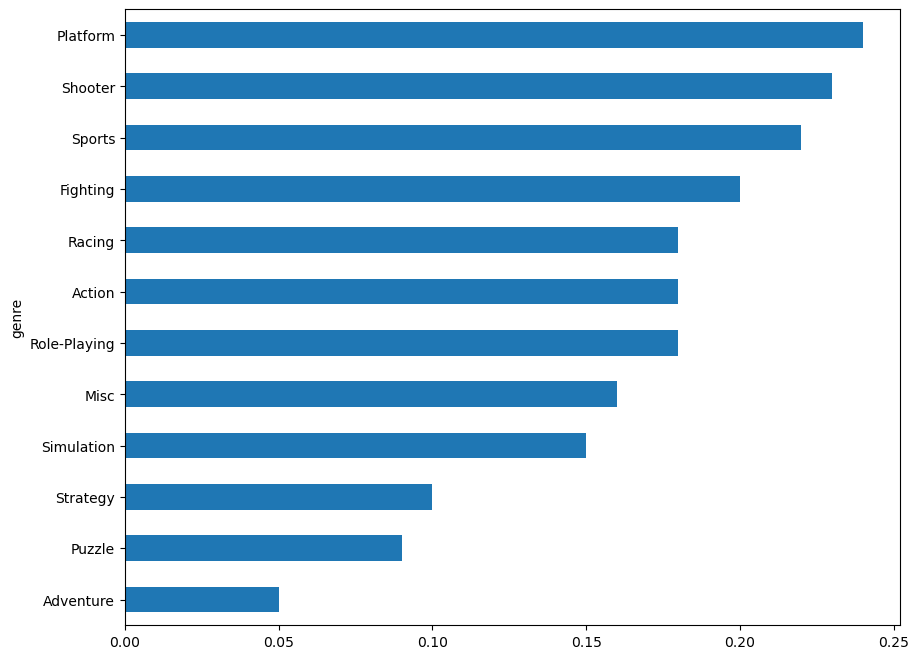

In [61]:
df.groupby('genre')['total_sales'].median().sort_values(ascending=True).plot(kind='barh', figsize=(10,8));

–í —Ü–µ–ª–æ–º, –ø–µ—Ä–≤—ã–µ 2 –º–µ—Å—Ç–∞ –ø–æ—Ö–æ–∂–∏–µ, –¥–∞–ª–µ–µ –∏–¥—É—Ç –∂–∞–Ω—Ä Faighting, —Ç—É—Ç, –Ω–∞–≤–µ—Ä–Ω–æ–µ, –æ—Ç–ª–∏—á–∏–ª—Å—è –ú–æ—Ä—Ç–∞–ª –ö–æ–º–±–∞—Ç, –ø–æ–ª–æ–º–∞–ª –≤—Å—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∏ –ø–æ—Ö–æ–∂–∏–µ –∏–≥—Ä—ã :-) 

–®–∞–≥ 4. –°–æ—Å—Ç–∞–≤—å—Ç–µ –ø–æ—Ä—Ç—Ä–µ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–µ–≥–∏–æ–Ω–∞

‚Ä¢	–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã (—Ç–æ–ø-5). –û–ø–∏—à–∏—Ç–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –¥–æ–ª—è—Ö –ø—Ä–æ–¥–∞–∂.

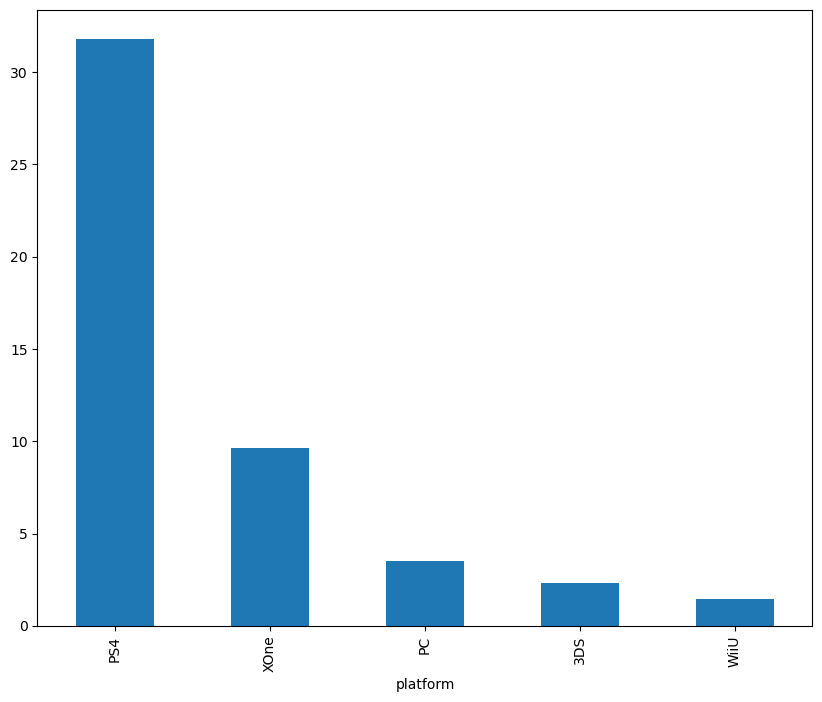

In [62]:
#–ø—Ä–æ–¥–æ–ª–∂—É —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª—å–∑—É—é—Ç—Å—è —Å–ø—Ä–æ—Å–æ–º –≤ 2016 –≥–æ–¥—É
df_total.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(10,8));

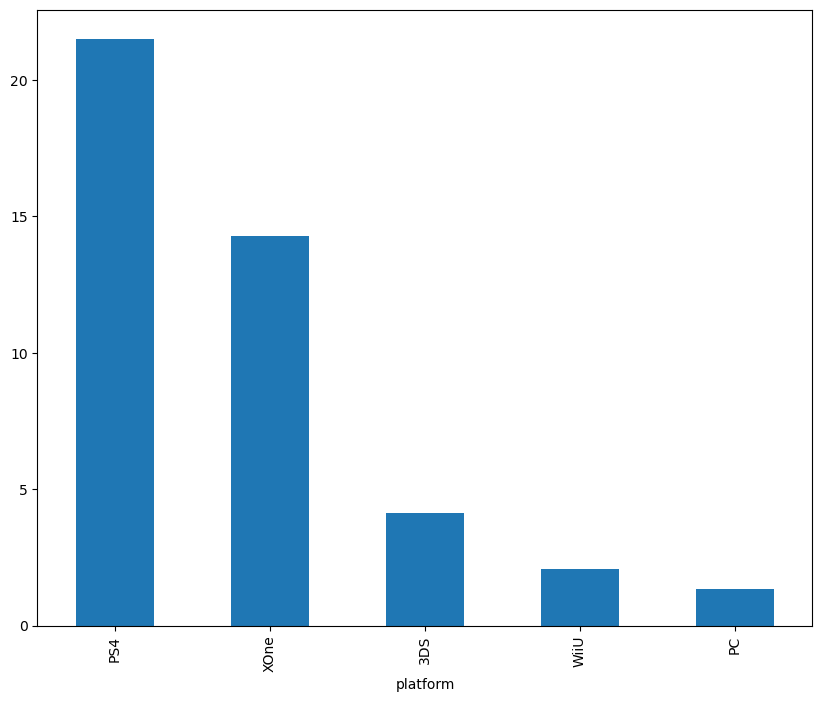

In [63]:
df_total.groupby('platform')['na_sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(10,8));

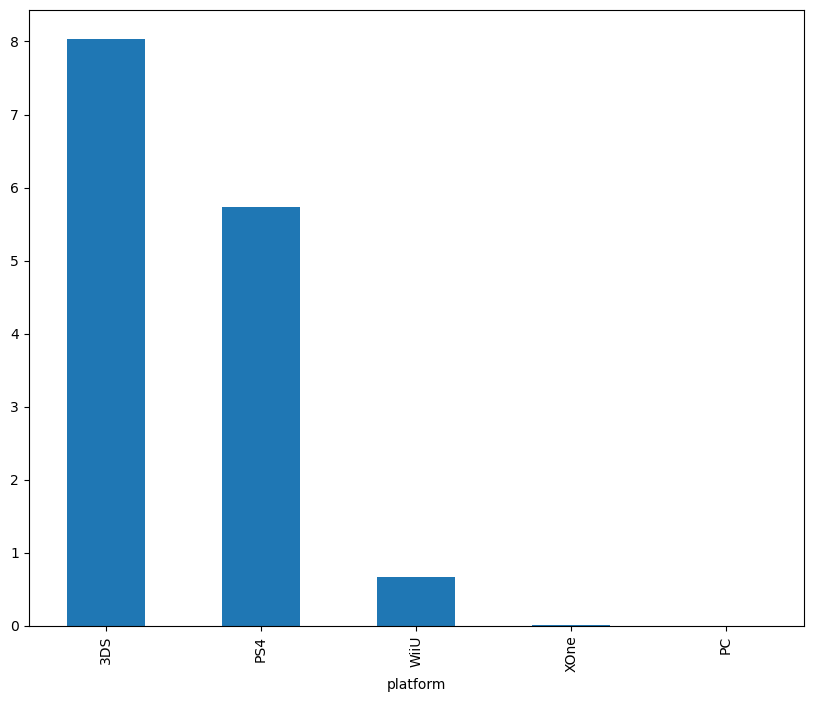

In [64]:
df_total.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(10,8));

–•–º, –∞ –∫–∞–∫ —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–º–µ–Ω—è—é—Ç—Å—è, –µ—Å–ª–∏ –¥–æ–±–∞–≤–∏–º –µ—â—ë 2015 –≥–æ–¥, —É –Ω–∞—Å –µ—Å—Ç—å –ø—Ä–∏–ø–∞—Å–µ–Ω–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∫–∞–∫ —Ä–∞–∑ df_2015

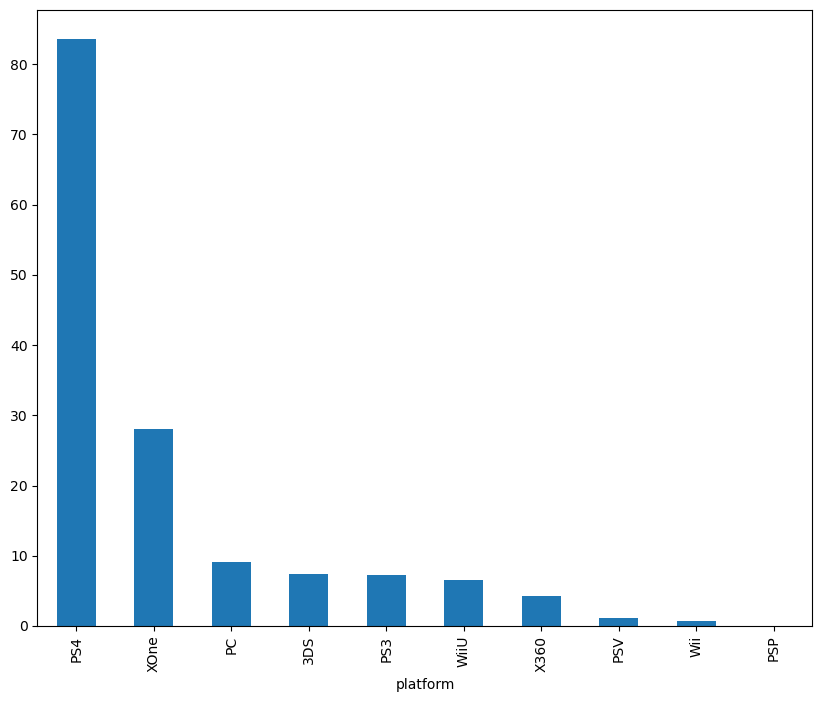

In [65]:
df_2015.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(10,8));

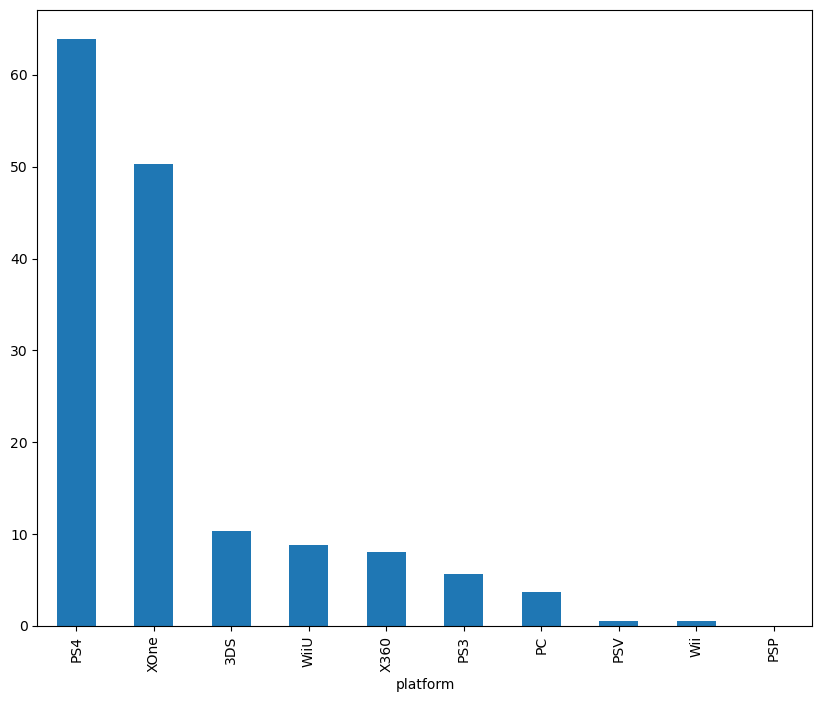

In [66]:
df_2015.groupby('platform')['na_sales'].sum().sort_values(ascending = False).plot(y='na_sales', kind='bar', figsize=(10,8));

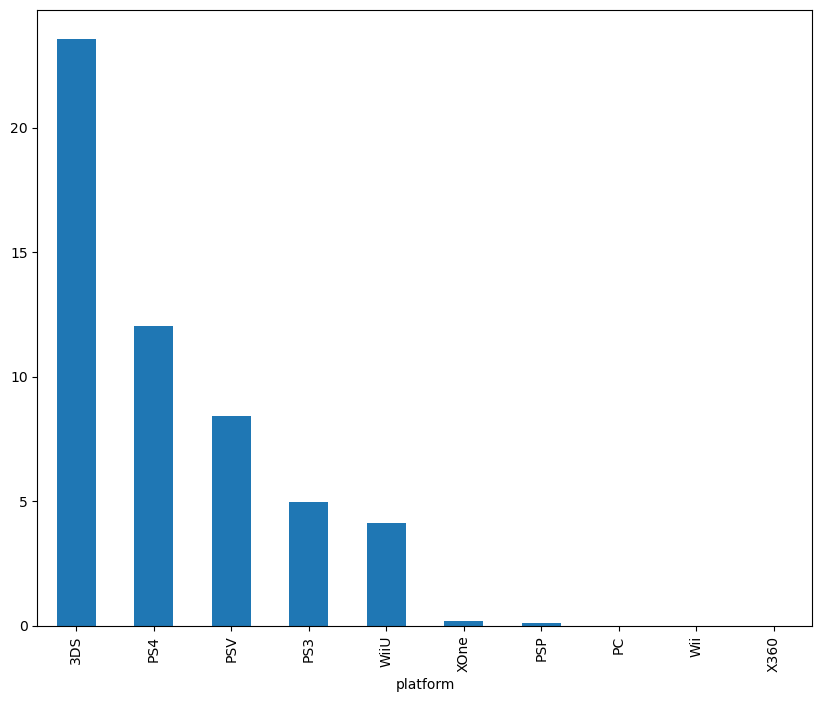

In [67]:
df_2015.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(10,8));

–ò–∑ —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–π –≤—ã–≤–æ–¥:
- —è–ø–æ–Ω—Å–∫–∏–π —Ä–µ–≥–∏–æ–Ω —Ñ–∞–Ω–∞—Ç –ø–æ—Ä—Ç–∞—Ç–∏–≤–Ω—ã—Ö –ø—Ä–∏—Å—Ç–∞–≤–æ–∫, –∑–∞—Ç–µ–º PS4, —Å–∏–ª—å–Ω–æ –¥–µ–ª–∞—Ç—å –º–∞—Ä–∫–µ—Ç–∏–Ω–≥ –¥–ª—è –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–π –∫–æ–º–ø–∞–Ω–∏–∏ —Å–º—ã—Å–ª–∞ –Ω–∏–∫–∞–∫–æ–≥–æ, —Ä—ã–Ω–æ–∫ –æ—á–µ–Ω—å —Ñ–∞–Ω–∞—Ç–∏—á–µ–Ω —Å–≤–æ–µ–º—É –ø—Ä–æ–¥—É–∫—Ç—É
- –í –ï–≤—Ä–æ–ø–µ –Ω–∞ –ø–µ—Ä–≤–æ–º –º–µ—Å—Ç–µ PS4, –¥–∞–ª–µ–µ —É–∂–µ –∏–¥–µ—Ç XOne. –¢–æ –µ—Å—Ç—å –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞–µ—Ç —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏—Å—Ç–∞–≤–∫–∏, –Ω–æ —è–ø–æ–Ω—Å–∫–∞—è —Ñ–∏—Ä–º–∞ –æ—á–µ–Ω—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –¥–æ–º–∏–Ω–∏—Ä—É–µ—Ç
- –≤ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–º —Ä–µ–≥–∏–æ–Ω–µ —Å–∏—Ç—É–∞—Ü–∏—è —É–∂–µ –¥—Ä—É–≥–∞—è, PS4 –æ–±–≥–æ–Ω—è–µ—Ç —Å–≤–æ–µ–≥–æ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–∞ –æ—á–µ–Ω—å —Å–ª–∞–±–æ, –∞ –∑–Ω–∞—á–∏—Ç, –≤ —ç—Ç–æ–º —Ä–µ–≥–∏–æ–Ω–∞ –Ω–∞–∏–±–æ–ª—å—à–∏–µ —à–∞–Ω—Å—ã –ø–æ–¥–≤–∏–Ω—É—Ç—å –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–∞, –∑–¥–µ—Å—å –∏–¥–µ—Ç —Å–∞–º–∞—è –æ–∂–µ—Å—Ç–æ—á–µ–Ω–Ω–∞—è –±–æ—Ä—å–±–∞ –º–µ–∂–¥—É XOne –∏ PS4


‚Ä¢	–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã (—Ç–æ–ø-5). –ü–æ—è—Å–Ω–∏—Ç–µ —Ä–∞–∑–Ω–∏—Ü—É. —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å—Ä–∞–∑—É –∑–∞ 2 –≥–æ–¥–∞

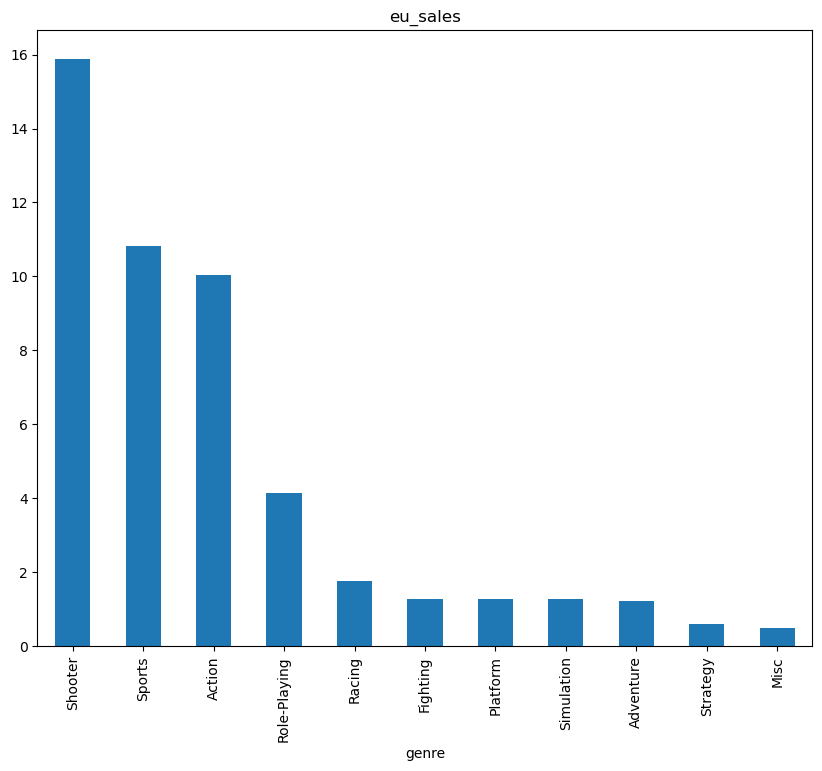

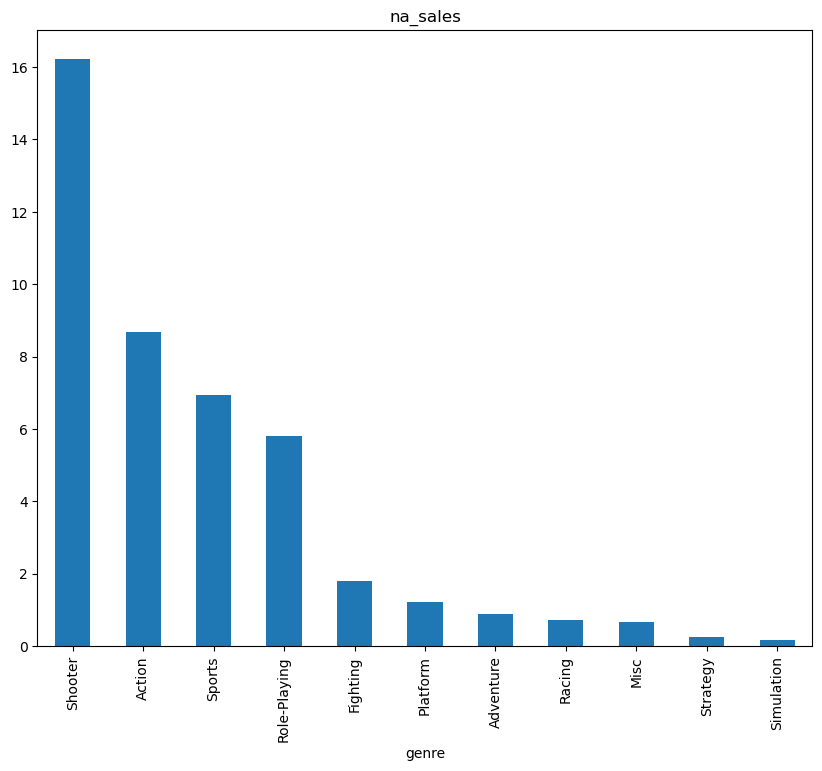

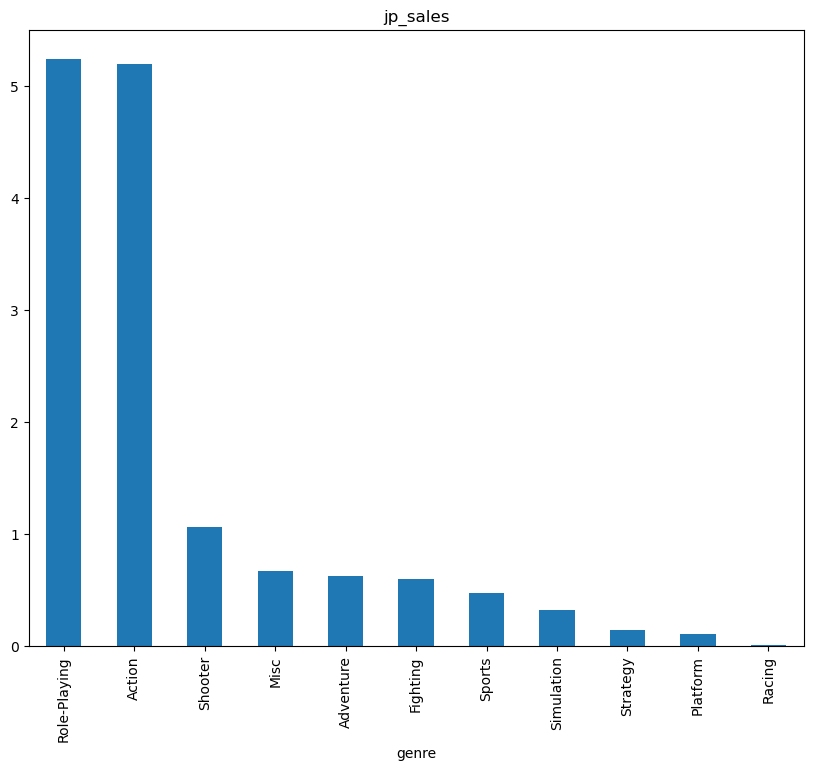

In [68]:
#–ø–æ–ª—É—á–∏–ª–æ—Å—å –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ü–∏–∫–ª–æ–º, —Å–µ–π—á–∞—Å –Ω–∞–¥–µ–ª–∞—é –≥—Ä–∞—Ñ–∏–∫–æ–≤ =)
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df_total.groupby('genre')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()


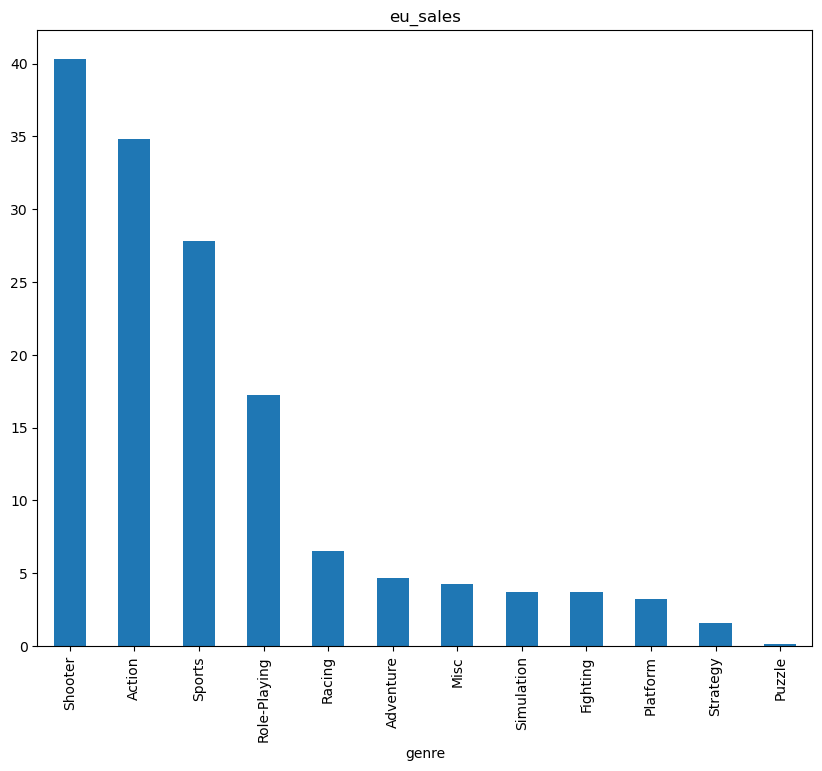

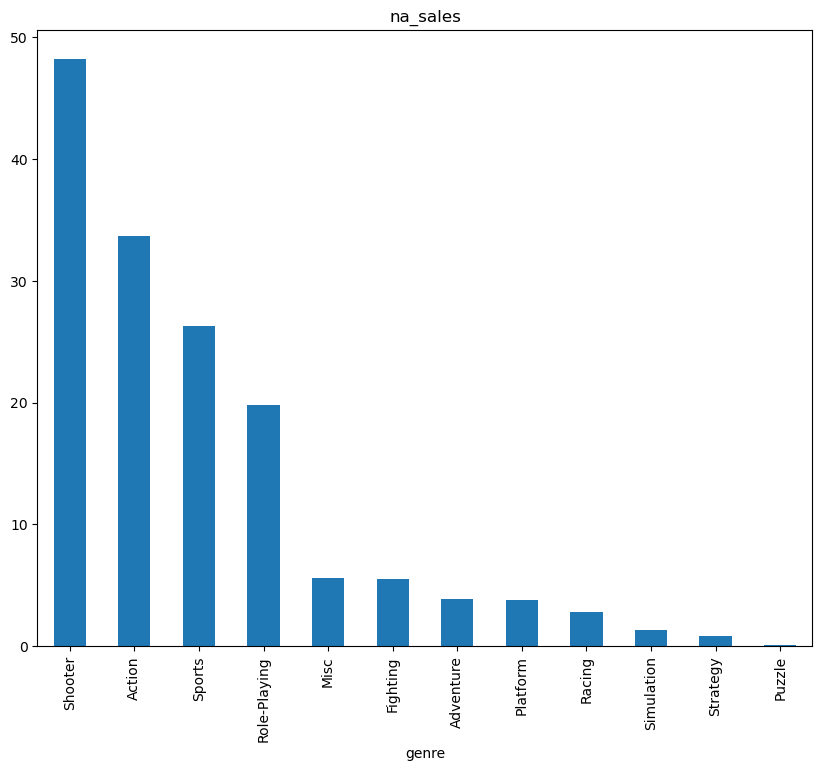

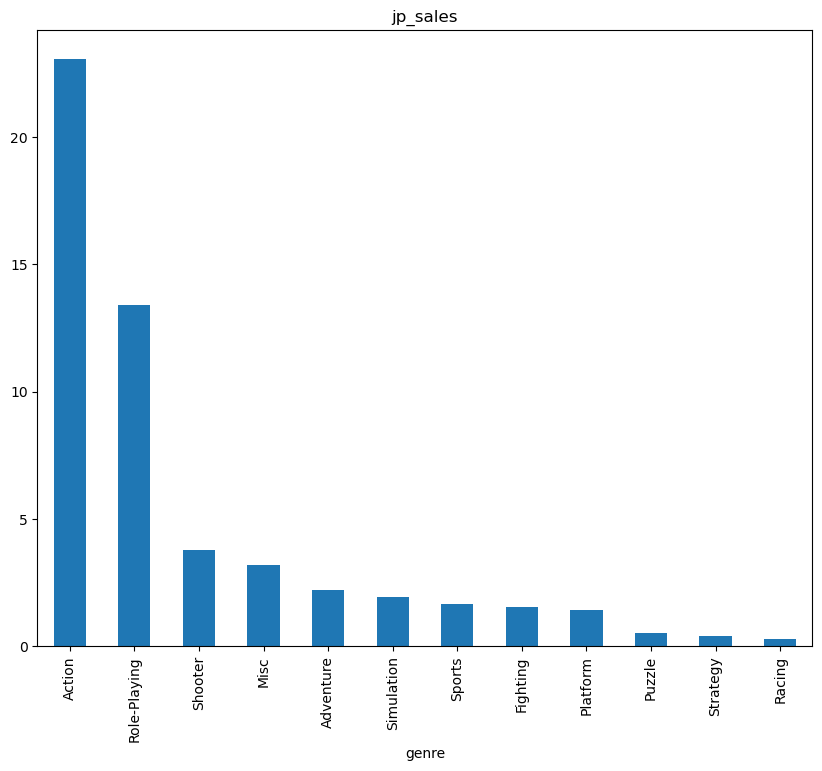

In [69]:
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df_2015.groupby('genre')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()

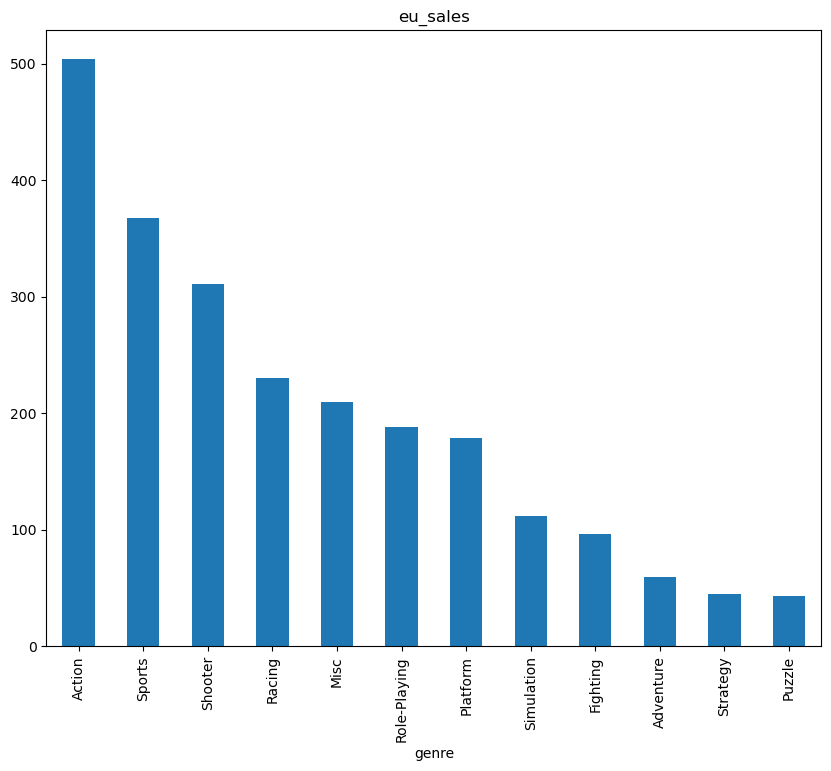

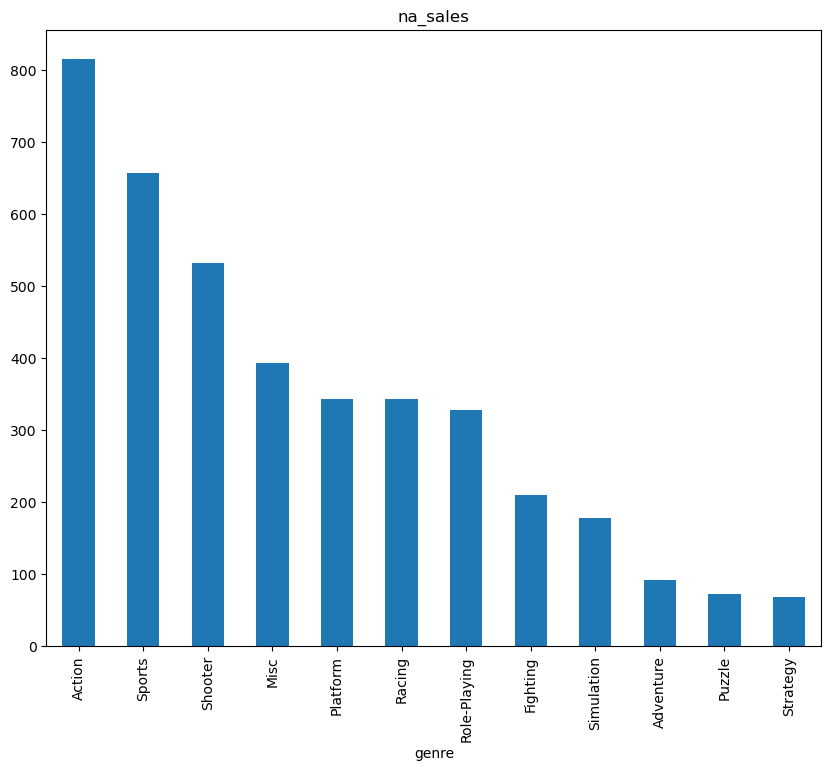

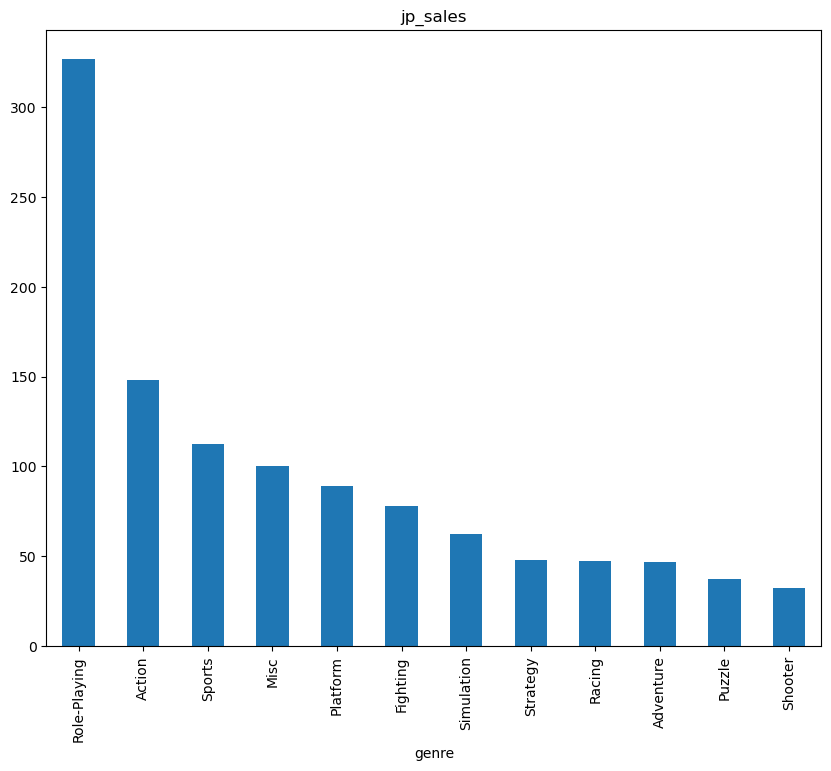

In [70]:
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df.groupby('genre')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()

–ê –≤–æ—Ç –∑–¥–µ—Å—å —É–∂–µ –Ω–µ –≤—Å—ë —Ç–∞–∫ –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ —Å—Ç–∞–ª–æ. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –≥—Ä–∞—Ñ–∏–∫–æ–≤ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å—è—Ç –æ—Ç "—Å–∏–ª—å–Ω—ã—Ö" —Ä–µ–ª–∏–∑–æ–≤ –≤ —Ç–æ–º –∏–ª–∏ –¥—Ä—É–≥–æ–º –∂–∞–Ω—Ä–µ. 

–ï–≤—Ä–æ–ø–µ–π—Å–∫–∏–π —Ä—ã–Ω–æ–∫:
1. –ù–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω—ã–π –∂–∞–Ω—Ä –Ω–∞ –¥–æ–ª–≥–æ–π –¥–∏—Å—Ç–∞–Ω—Ü–∏–∏ —ç—Ç–æ Action. 
2. –ù–æ –¥–∞–ª–µ–µ Shooter –º–æ–µ—Ç –æ–±–≥–æ–Ω—è—Ç—å, –µ—Å–ª–∏ —É —ç–∫—à–µ–Ω–∞ –Ω–µ—Ç —Å–∏–ª—å–Ω–æ–≥–æ —Ä–µ–ª–∏–∑–∞, –ª–∏–±–æ –Ω–∞–æ–±–æ—Ä–æ—Ç, —Å–∏–ª—å–Ω—ã–π —Ä–µ–ª–∏–∑ –Ω–∞ Shooter. 
3. –ñ–∞–Ω—Ä —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã—Ö —Å–∏–º–º—É–ª–∏—Ç–æ—Ä–æ–≤ –≤—Å–µ–≥–¥ –≤ —Ç—Ä–æ–π–∫–µ. –ï—Å–ª–∏ –¥—Ä—É–≥–∏–µ –±–µ–∑ —Å–∏–ª—å–Ω—ã–π —Ä–µ–ª–∏–∑–æ–≤, —Ç–æ —Å–ø–æ—Ä—Ç –º–æ–∂–µ—Ç –≤–∑—è—Ç—å –ø–µ—Ä–≤–æ–µ –º–µ—Å—Ç–æ

–ê–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π —Ä—ã–Ω–æ–∫:
1. –ù–∞ –¥–æ–ª–≥–æ–π –¥–∏—Å—Ç–∞–Ω—Ü–∏–∏ –Ω–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω—ã–π –∂–∞–Ω—Ä Action, –∑–∞—Ç–µ–º Sport, –¥–∞–ª–µ–µ Shooter 
2. –ü–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –∂–∞–Ω—Ä–æ–º –∏–¥–µ—Ç Shooter, –∑–∞—Ç–µ–º Action –∏ –¥–∞–ª–µ–µ Sport. 
3. –° —Ä–∞–∑–≤–∏—Ç–∏–µ–º —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π –∏–≥—Ä–æ–≤–æ–π –∏–Ω–¥—É—Å—Ç—Ä–∏–∏ –∂–∞–Ω—Ä Sport —Å–¥–≤–∏–Ω—É–ª—Å—è –Ω–∞ 3 –º–µ—Å—Ç—Ä–æ –≤ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

–Ø–ø–æ–Ω—Å–∫–∏–π —Ä—ã–Ω–æ–∫:
–£ —Å–∞–º—É—Ä–∞–µ–≤ —Å–≤–æ–π –ø—É—Ç—å, —Ç–∞–∫ –∫–∞–∫
1. –ù–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–π –¥–∏—Å—Ç–∞–Ω—Ü–∏–∏ –∂–∞–Ω—Ä Role-Playing –≤–Ω–µ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏–∏ 
2. –ó–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞, –≤–∏–¥–∏–º–æ, –∑–∞ —Å—á–µ—Ç —Å–∏–ª—å–Ω—ã—Ö —Ä–µ–ª–∏–∑–æ–≤ –∂–∞–Ω—Ä Action —Å–º–æ–≥ –æ–±–æ–≥–Ω–∞—Ç—å Role-Playing
3. –ü–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥ –∂–∞–Ω—Ä Action —É—Å—Ç—É–ø–∏–ª –ª–∏–¥–µ—Ä—Å—Ç–≤–æ Role-Playing

<div class="alert alert-success">
<b>–û–¢–õ–ò–ß–ù–û! üëç</b>

–í —ç—Ç–∏—Ö 2—Ö –ø–æ–¥—Ä–∞–∑–¥–µ–ª–∞—Ö –≤—Å—ë –æ—Ç–ª–∏—á–Ω–æ! –ü—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –≥–µ–π–º–µ—Ä–æ–≤ 3—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –∏–≥—Ä–æ–≤—ã—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º –∏ –∂–∞–Ω—Ä–æ–≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã. –ù—É –∏ –≤—ã–≤–æ–¥ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç —ç—Ç–∏ –æ—Ç–ª–∏—á–∏—è.</div>


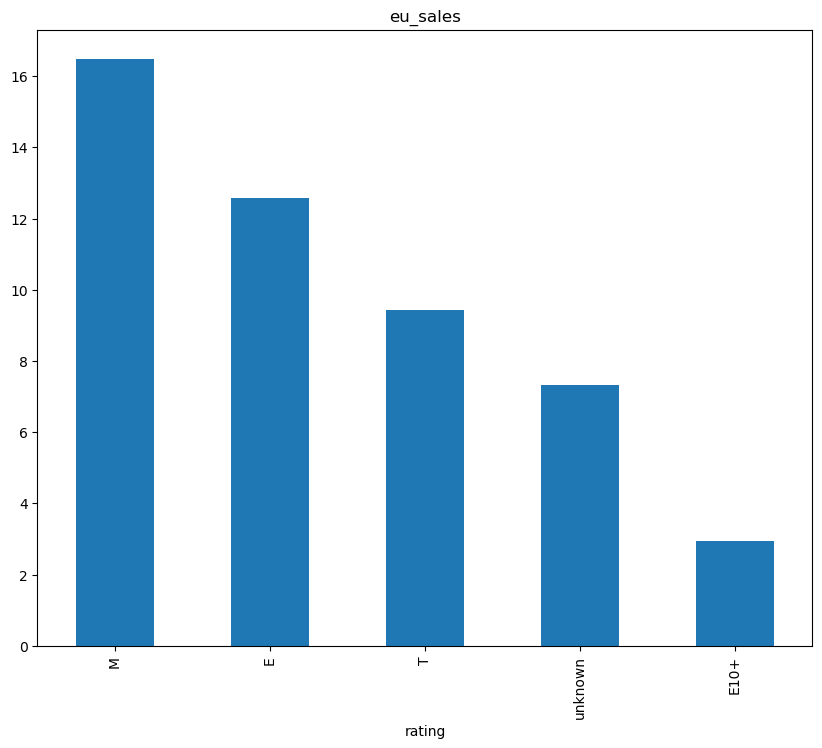

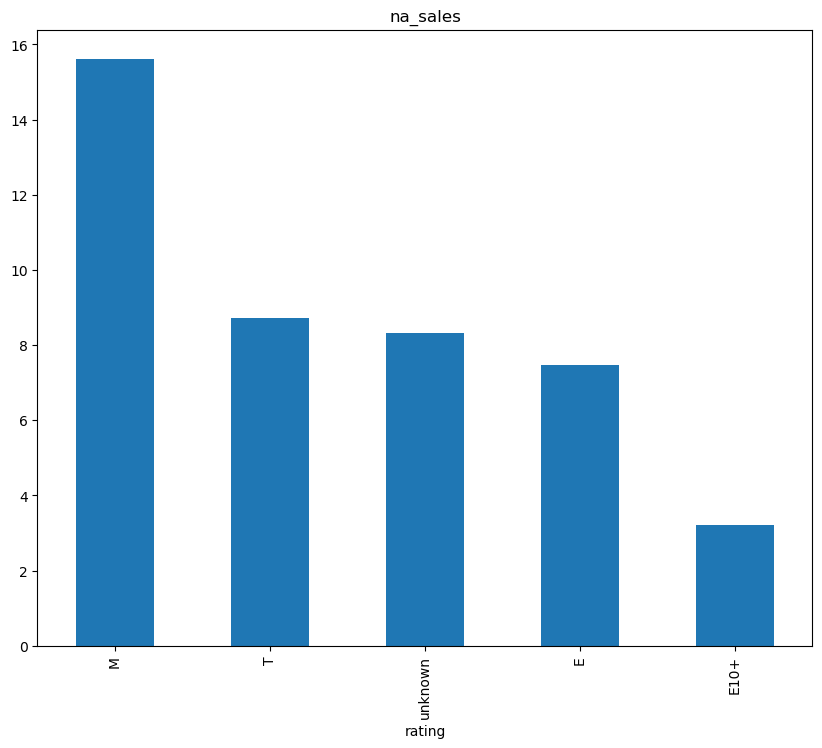

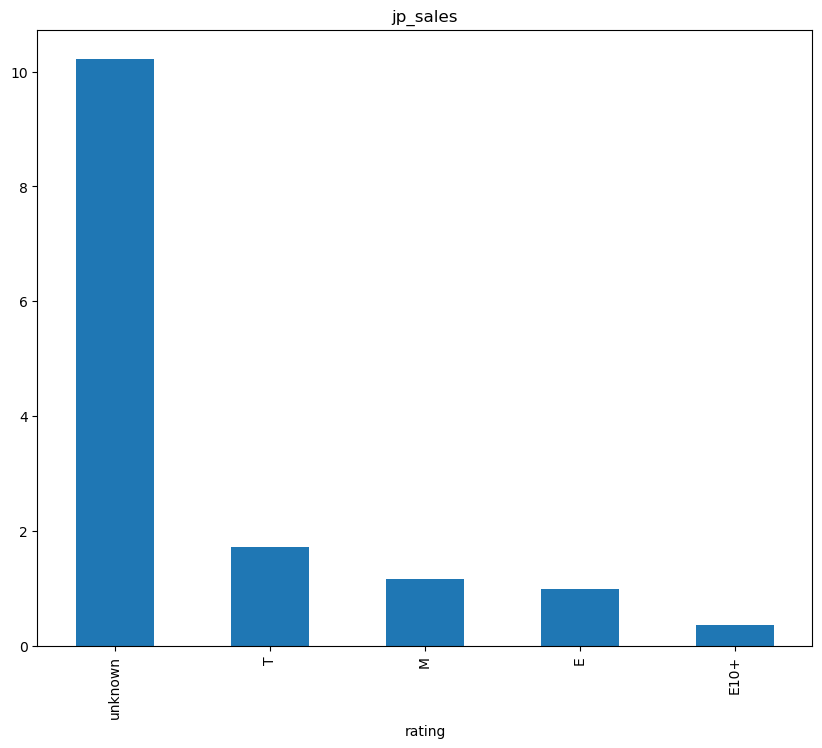

In [71]:
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df_total.groupby('rating')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()

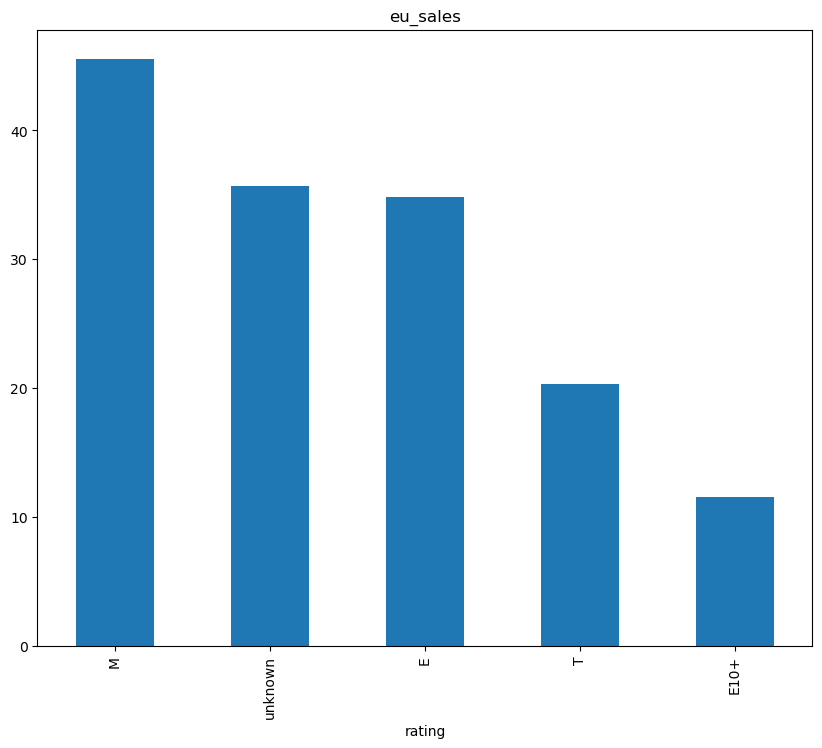

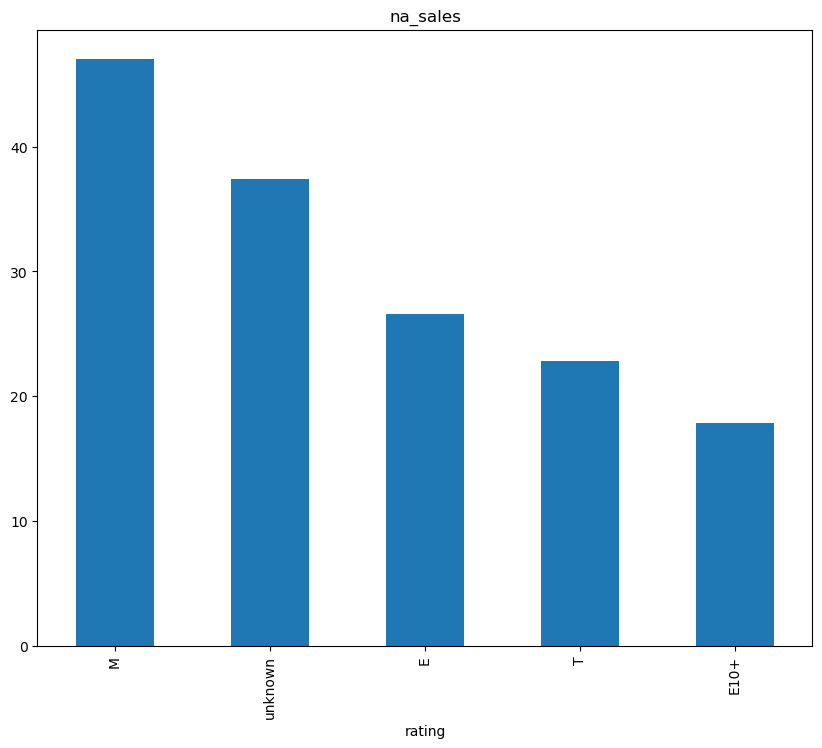

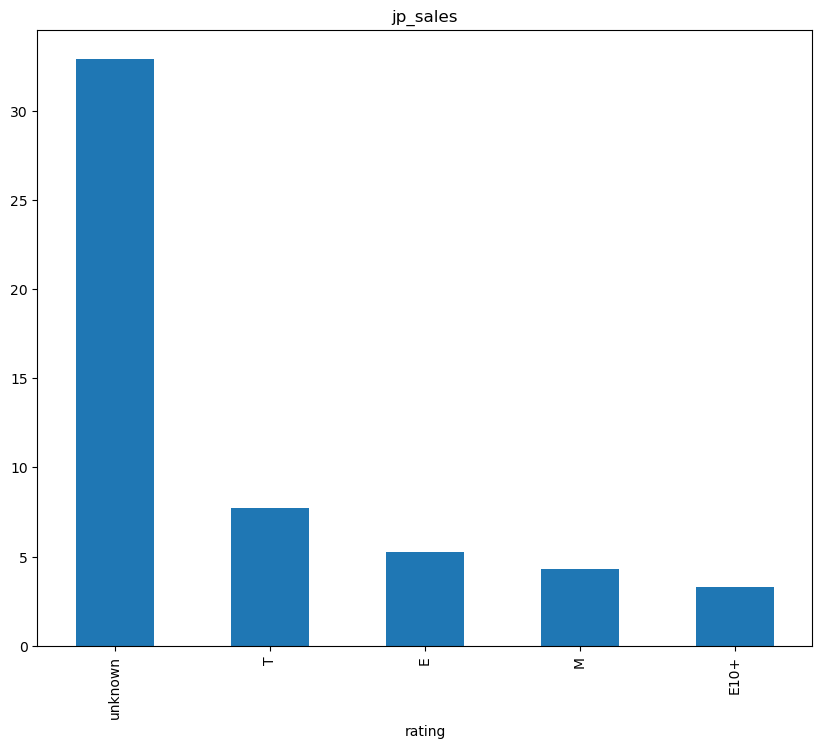

In [72]:
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df_2015.groupby('rating')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()

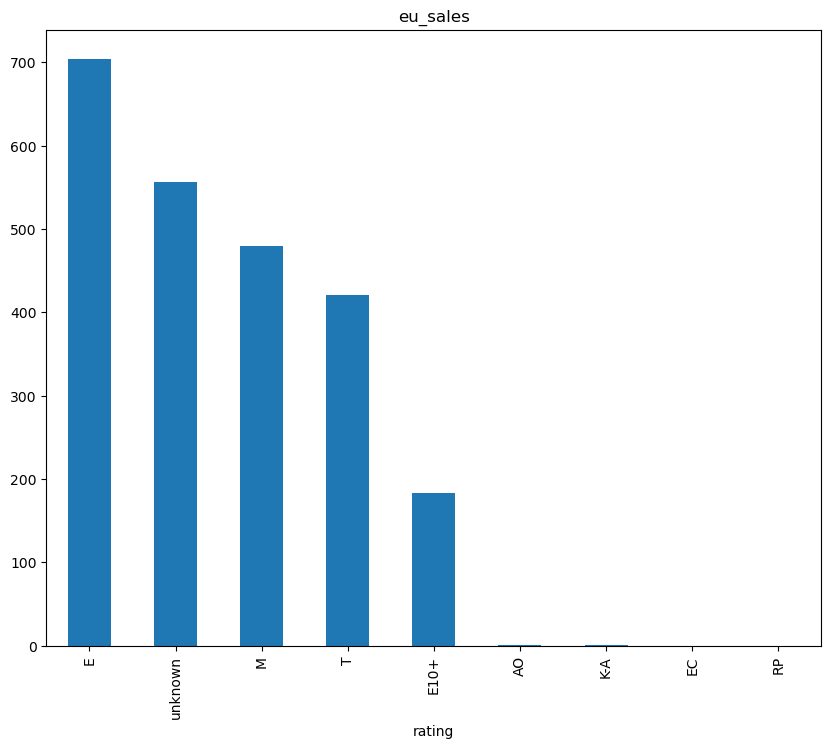

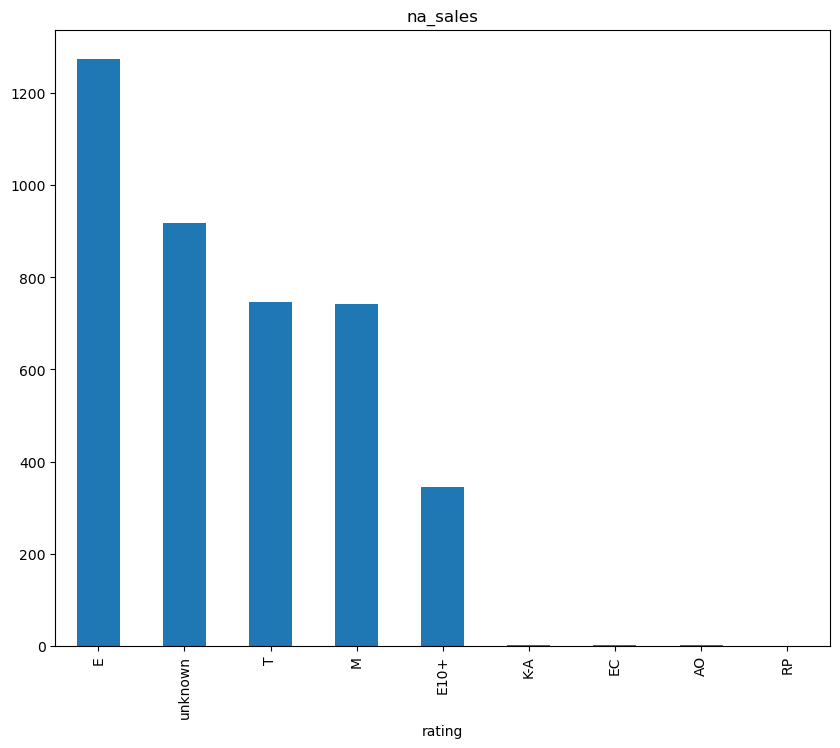

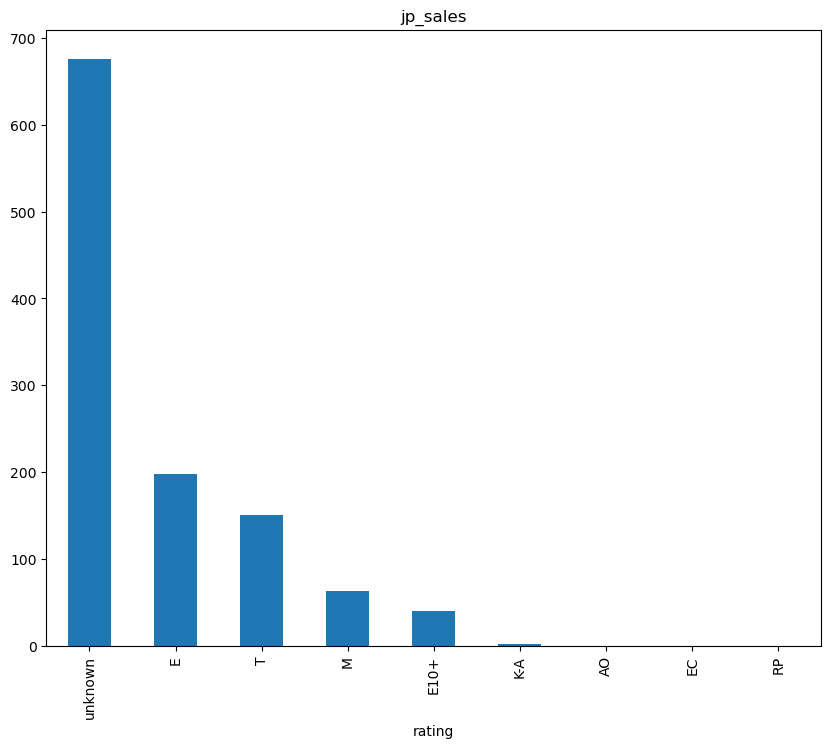

In [73]:
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df.groupby('rating')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()

–ù–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–π –¥–∏—Å—Ç–∞–Ω—Ü–∏–∏ —Ä–µ–π—Ç–∏–Ω–≥ –ï –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç –¥–ª—è —Å—Ç—Ä–∞–Ω –ï–≤—Ä–æ–ø—ã –∏ –ê–º–µ—Ä–∏–∫–∏. –í—Å—ë —Å–∞–º–æ–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ–µ –∂–µ –≤ –Ø–ø–æ–Ω–∏–∏ –Ω–µ –æ—Ü–µ–Ω–∏–Ω–æ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–º –∞–≥–µ–Ω—Å—Ç–≤–æ–º 

–î–∞–ª–µ–µ –≤ –ê–º–µ—Ä–∏–∫–µ –∏ –ï–≤—Ä–æ–ø–µ –∏–¥—É—Ç –∏–≥—Ä—ã –±–µ–∑ —Ä–µ–π—Ç–∏–Ω–≥–∞, –∞ –≤ –Ø–ø–æ–Ω–∏–∏ —Ä–µ–π—Ç–∏–Ω–≥ –¢

–ù–æ –µ—Å–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å —Å–∏—Ç—É–∞—Ü–∏—è –≤ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞, —Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ–º–Ω–æ–≥–æ –¥—Ä—É–≥–æ–µ.
–í –ï–≤—Ä–æ–ø–µ –∏ –ê–º–µ—Ä–∏–∫–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –≤—ã—Å—Ç—Ä–æ–∏–ª–∏—Å—å —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º –ú -> unknown -> –ö
–í –Ø–ø–æ–Ω–∏–∏ –∂–µ –∏–∑-–∑–∞ –¥—Ä—É–≥–æ–≥–æ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –ø–æ –∂–∞–Ω—Ä–æ–º, –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –ø–æ–ª—É—á–∏–ª—Å—è  Unk -> E -> T
–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º "–≤–∫—É—Å—ã" —Å–º–µ—Å—Ç–∏–ª–∏—Å—å –≤ –ï–≤—Ä–æ–ø–µ –ò –ê–º–µ—Ä–∏–∫–µ —Å –ï –Ω–∞ –ú, —É —è–ø–æ–Ω—Ü–µ–≤ –∂–µ –ø–æ–º–µ–Ω—è–ª–æ—Å—å –≤—Ç–æ—Ä–æ–µ –º–µ—Å—Ç–æ, —Å –ï –Ω–∞ –¢

–®–∞–≥ 5. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –≥–∏–ø–æ—Ç–µ–∑—ã

–°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –≥–∏–ø–æ—Ç–µ–∑—É:

H0 - –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ;

H1 - –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC –æ—Ç–ª–∏—á–∞—é—Ç—Å—è;

In [74]:
#–¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–æ–∑—å–º–µ–º –¥–∞–Ω–Ω—ã–µ –∑–∞ 2015 –∏ 2016 –≥–æ–¥, —Å—Ä–∞–≤–Ω–∏–º Xbox –∏ PC
pc_2015 = df_2015.query ('platform == "PC"')
pc_2015['user_score'].mean()

6.296428571428573

In [75]:
xbox_2015 = df_2015.query ('platform == "XOne"')
xbox_2015['user_score'].mean()

6.542148760330578

In [76]:
pc_2015.head()

name platform  year_of_release         genre  \
1530                     Fallout 4       PC             2015  Role-Playing   
1730            Grand Theft Auto V       PC             2015        Action   
2851      The Witcher 3: Wild Hunt       PC             2015  Role-Playing   
3123          Farming Simulator 17       PC             2016    Simulation   
3666  Star Wars Battlefront (2015)       PC             2015       Shooter   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1530      0.51      0.67       0.0         0.10          84.0         5.4   
1730      0.39      0.69       0.0         0.09          96.0         7.9   
2851      0.21      0.46       0.0         0.05          93.0         9.3   
3123      0.03      0.58       0.0         0.04          64.0         8.0   
3666      0.13      0.38       0.0         0.04           NaN         NaN   

       rating  total_sales  
1530        M         1.28  
1730        M         1.17  
2851        M         0.72  
3123        E         0.65  
3666  unknown         0.55

In [77]:
#–ø—Ä–∏–º–µ–º –∞–ª—å—Ñ–∞ –≤ 5%, 0.05
alpha = .05

results = st.ttest_ind(xbox_2015['user_score'].dropna(), pc_2015['user_score'].dropna(), equal_var=False)
print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)
if (results.pvalue < alpha):
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:
    print("–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.2946308864003345
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –≥–∏–ø–æ—Ç–µ–∑—É:

–ù0: –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action –∏ Sports  —Ä–∞–∑–Ω—ã–µ.

–ù1: –û–¥–∏–Ω–∞–∫–æ–≤—ã–µ

In [78]:
#–¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–æ–∑—å–º–µ–º –¥–∞–Ω–Ω—ã–µ –∑–∞ 2015 –∏ 2016 –≥–æ–¥, —Å—Ä–∞–≤–Ω–∏–º Xbox –∏ PC
action_2015 = df_2015.query ('genre == "Action"')
action_2015['user_score'].mean()

6.808290155440415

In [79]:
sport_2015 = df_2015.query ('genre == "Sports"')
sport_2015['user_score'].mean()

5.198780487804878

In [80]:
#–ø—Ä–∏–º–µ–º –∞–ª—å—Ñ–∞ –≤ 5%, 0.05
alpha = .05

results = st.ttest_ind(action_2015['user_score'].dropna(), sport_2015['user_score'].dropna(), equal_var=False)
print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)
if (results.pvalue > alpha):
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:
    print("–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 5.97163549920592e-10
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–í—ã–≤–æ–¥: 

1. —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC –∑–Ω–∞—á–∏–º–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è
2. —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action  –∏ Sports  –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ


–®–∞–≥ 6. –ù–∞–ø–∏—à–∏—Ç–µ –æ–±—â–∏–π –≤—ã–≤–æ–¥

–ù–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–π –¥–∏—Å—Ç–∞–Ω—Ü–∏–∏ —Ä–µ–π—Ç–∏–Ω–≥ –ï –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç –¥–ª—è —Å—Ç—Ä–∞–Ω –ï–≤—Ä–æ–ø—ã –∏ –ê–º–µ—Ä–∏–∫–∏. –í—Å—ë —Å–∞–º–æ–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ–µ –∂–µ –≤ –Ø–ø–æ–Ω–∏–∏ –Ω–µ –æ—Ü–µ–Ω–∏–Ω–æ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–º –∞–≥–µ–Ω—Å—Ç–≤–æ–º 

–î–∞–ª–µ–µ –≤ –ê–º–µ—Ä–∏–∫–µ –∏ –ï–≤—Ä–æ–ø–µ –∏–¥—É—Ç –∏–≥—Ä—ã –±–µ–∑ —Ä–µ–π—Ç–∏–Ω–≥–∞, –∞ –≤ –Ø–ø–æ–Ω–∏–∏ —Ä–µ–π—Ç–∏–Ω–≥ –¢

–ù–æ –µ—Å–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å —Å–∏—Ç—É–∞—Ü–∏—è –≤ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞, —Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ–º–Ω–æ–≥–æ –¥—Ä—É–≥–æ–µ.

–í –ï–≤—Ä–æ–ø–µ –∏ –ê–º–µ—Ä–∏–∫–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –≤—ã—Å—Ç—Ä–æ–∏–ª–∏—Å—å —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º –ú -> unknown -> –ö
–í –Ø–ø–æ–Ω–∏–∏ –∂–µ –∏–∑-–∑–∞ –¥—Ä—É–≥–æ–≥–æ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –ø–æ –∂–∞–Ω—Ä–æ–º, –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –ø–æ–ª—É—á–∏–ª—Å—è  Unk -> E -> T

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º "–≤–∫—É—Å—ã" —Å–º–µ—Å—Ç–∏–ª–∏—Å—å –≤ –ï–≤—Ä–æ–ø–µ –ò –ê–º–µ—Ä–∏–∫–µ —Å –ï –Ω–∞ –ú, —É —è–ø–æ–Ω—Ü–µ–≤ –∂–µ –ø–æ–º–µ–Ω—è–ª–æ—Å—å –≤—Ç–æ—Ä–æ–µ –º–µ—Å—Ç–æ, —Å –ï –Ω–∞ –¢



—è–ø–æ–Ω—Å–∫–∏–π —Ä–µ–≥–∏–æ–Ω —Ñ–∞–Ω–∞—Ç –ø–æ—Ä—Ç–∞—Ç–∏–≤–Ω—ã—Ö –ø—Ä–∏—Å—Ç–∞–≤–æ–∫, –∑–∞—Ç–µ–º PS4, —Å–∏–ª—å–Ω–æ –¥–µ–ª–∞—Ç—å –º–∞—Ä–∫–µ—Ç–∏–Ω–≥ –¥–ª—è –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–π –∫–æ–º–ø–∞–Ω–∏–∏ —Å–º—ã—Å–ª–∞ –Ω–∏–∫–∞–∫–æ–≥–æ, —Ä—ã–Ω–æ–∫ –æ—á–µ–Ω—å —Ñ–∞–Ω–∞—Ç–∏—á–µ–Ω —Å–≤–æ–µ–º—É –ø—Ä–æ–¥—É–∫—Ç—É

–í —è–ø–æ–Ω–∏–∏ –Ω–∞ –ø–µ—Ä–≤–æ–º –º–µ—Å—Ç–µ PS4, –¥–∞–ª–µ–µ —É–∂–µ –∏–¥–µ—Ç XOne. –¢–æ –µ—Å—Ç—å –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞–µ—Ç —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏—Å—Ç–∞–≤–∫–∏, –Ω–æ —è–ø–æ–Ω—Å–∫–∞—è —Ñ–∏—Ä–º–∞ –æ—á–µ–Ω—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –¥–æ–º–∏–Ω–∏—Ä—É–µ—Ç

–≤ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–º —Ä–µ–≥–∏–æ–Ω–µ —Å–∏—Ç—É–∞—Ü–∏—è —É–∂–µ –¥—Ä—É–≥–∞—è, PS4 –æ–±–≥–æ–Ω—è–µ—Ç —Å–≤–æ–µ–≥–æ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–∞ –æ—á–µ–Ω—å —Å–ª–∞–±–æ, –∞ –∑–Ω–∞—á–∏—Ç, –≤ —ç—Ç–æ–º —Ä–µ–≥–∏–æ–Ω–∞ –Ω–∞–∏–±–æ–ª—å—à–∏–µ —à–∞–Ω—Å—ã –ø–æ–¥–≤–∏–Ω—É—Ç—å –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–∞, –∑–¥–µ—Å—å –∏–¥–µ—Ç —Å–∞–º–∞—è –æ–∂–µ—Å—Ç–æ—á–µ–Ω–Ω–∞—è –±–æ—Ä—å–±–∞ –º–µ–∂–¥—É XOne –∏ PS4

–ó–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞ —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏ –Ω–∞—á–∞–ª–∏ –º–µ–Ω—è—Ç—å—Å—è
–ï–≤—Ä–æ–ø–µ–π—Å–∫–∏–π —Ä—ã–Ω–æ–∫:

–ù–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω—ã–π –∂–∞–Ω—Ä –Ω–∞ –¥–æ–ª–≥–æ–π –¥–∏—Å—Ç–∞–Ω—Ü–∏–∏ —ç—Ç–æ Action.
–ù–æ –¥–∞–ª–µ–µ Shooter –º–æ–µ—Ç –æ–±–≥–æ–Ω—è—Ç—å, –µ—Å–ª–∏ —É —ç–∫—à–µ–Ω–∞ –Ω–µ—Ç —Å–∏–ª—å–Ω–æ–≥–æ —Ä–µ–ª–∏–∑–∞, –ª–∏–±–æ –Ω–∞–æ–±–æ—Ä–æ—Ç, —Å–∏–ª—å–Ω—ã–π —Ä–µ–ª–∏–∑ –Ω–∞ Shooter.
–ñ–∞–Ω—Ä —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã—Ö —Å–∏–º–º—É–ª–∏—Ç–æ—Ä–æ–≤ –≤—Å–µ–≥–¥ –≤ —Ç—Ä–æ–π–∫–µ. –ï—Å–ª–∏ –¥—Ä—É–≥–∏–µ –±–µ–∑ —Å–∏–ª—å–Ω—ã–π —Ä–µ–ª–∏–∑–æ–≤, —Ç–æ —Å–ø–æ—Ä—Ç –º–æ–∂–µ—Ç –≤–∑—è—Ç—å –ø–µ—Ä–≤–æ–µ –º–µ—Å—Ç–æ

–ê–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π —Ä—ã–Ω–æ–∫:

–ù–∞ –¥–æ–ª–≥–æ–π –¥–∏—Å—Ç–∞–Ω—Ü–∏–∏ –Ω–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω—ã–π –∂–∞–Ω—Ä Action, –∑–∞—Ç–µ–º Sport, –¥–∞–ª–µ–µ Shooter
–ü–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –∂–∞–Ω—Ä–æ–º –∏–¥–µ—Ç Shooter, –∑–∞—Ç–µ–º Action –∏ –¥–∞–ª–µ–µ Sport.
–° —Ä–∞–∑–≤–∏—Ç–∏–µ–º —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π –∏–≥—Ä–æ–≤–æ–π –∏–Ω–¥—É—Å—Ç—Ä–∏–∏ –∂–∞–Ω—Ä Sport —Å–¥–≤–∏–Ω—É–ª—Å—è –Ω–∞ 3 –º–µ—Å—Ç—Ä–æ –≤ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

–Ø–ø–æ–Ω—Å–∫–∏–π —Ä—ã–Ω–æ–∫: –£ —Å–∞–º—É—Ä–∞–µ–≤ —Å–≤–æ–π –ø—É—Ç—å, —Ç–∞–∫ –∫–∞–∫

–ù–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–π –¥–∏—Å—Ç–∞–Ω—Ü–∏–∏ –∂–∞–Ω—Ä Role-Playing –≤–Ω–µ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏–∏
–ó–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞, –≤–∏–¥–∏–º–æ, –∑–∞ —Å—á–µ—Ç —Å–∏–ª—å–Ω—ã—Ö —Ä–µ–ª–∏–∑–æ–≤ –∂–∞–Ω—Ä Action —Å–º–æ–≥ –æ–±–æ–≥–Ω–∞—Ç—å Role-Playing
–ü–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥ –∂–∞–Ω—Ä Action —É—Å—Ç—É–ø–∏–ª –ª–∏–¥–µ—Ä—Å—Ç–≤–æ Role-Playing

–∑–∞ 2016 –≥–æ–¥ —Å–∏—Ç—É–∞—Ü–∏—è 
—è–ø–æ–Ω—Å–∫–∏–π —Ä–µ–≥–∏–æ–Ω —Ñ–∞–Ω–∞—Ç –ø–æ—Ä—Ç–∞—Ç–∏–≤–Ω—ã—Ö –ø—Ä–∏—Å—Ç–∞–≤–æ–∫, –∑–∞—Ç–µ–º PS4, —Å–∏–ª—å–Ω–æ –¥–µ–ª–∞—Ç—å –º–∞—Ä–∫–µ—Ç–∏–Ω–≥ –¥–ª—è –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–π –∫–æ–º–ø–∞–Ω–∏–∏ —Å–º—ã—Å–ª–∞ –Ω–∏–∫–∞–∫–æ–≥–æ, —Ä—ã–Ω–æ–∫ –æ—á–µ–Ω—å —Ñ–∞–Ω–∞—Ç–∏—á–µ–Ω —Å–≤–æ–µ–º—É –ø—Ä–æ–¥—É–∫—Ç—É

–í –ï–≤—Ä–æ–ø–µ –Ω–∞ –ø–µ—Ä–≤–æ–º –º–µ—Å—Ç–µ PS4, –¥–∞–ª–µ–µ —É–∂–µ –∏–¥–µ—Ç XOne. –¢–æ –µ—Å—Ç—å –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞–µ—Ç —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏—Å—Ç–∞–≤–∫–∏, –Ω–æ —è–ø–æ–Ω—Å–∫–∞—è —Ñ–∏—Ä–º–∞ –æ—á–µ–Ω—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –¥–æ–º–∏–Ω–∏—Ä—É–µ—Ç

–≤ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–º —Ä–µ–≥–∏–æ–Ω–µ —Å–∏—Ç—É–∞—Ü–∏—è —É–∂–µ –¥—Ä—É–≥–∞—è, PS4 –æ–±–≥–æ–Ω—è–µ—Ç —Å–≤–æ–µ–≥–æ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–∞ –æ—á–µ–Ω—å —Å–ª–∞–±–æ, –∞ –∑–Ω–∞—á–∏—Ç, –≤ —ç—Ç–æ–º —Ä–µ–≥–∏–æ–Ω–∞ –Ω–∞–∏–±–æ–ª—å—à–∏–µ —à–∞–Ω—Å—ã –ø–æ–¥–≤–∏–Ω—É—Ç—å –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–∞, –∑–¥–µ—Å—å –∏–¥–µ—Ç —Å–∞–º–∞—è –æ–∂–µ—Å—Ç–æ—á–µ–Ω–Ω–∞—è –±–æ—Ä—å–±–∞ –º–µ–∂–¥—É XOne –∏ PS4

–µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–µ–ª–∞–µ—Ç, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–æ–º–ø–∞–Ω–∏—è xbox, —Ç–æ –∏–º –Ω–∞–¥–æ –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –Ω–∞ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π —Ä—ã–Ω–æ–∫, –≤ –Ω—ë–º –∑–∞ —Å—á–µ—Ç –º–µ–Ω—å—à–∏–µ –∏–Ω–≤–µ—Å—Ç–∏–∏ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –±–æ–ª—å—à—É—é –ø—Ä–∏–±—ã–ª—å –∏ —É–∂–µ —Å —ç—Ç–∏–º–∏ —Å—Ä–µ–¥—Å—Ç–≤–∞–º–∏ –∏–¥—Ç–∏ –ø—ã—Ç–∞—Ç—å—Å—è "–≤—ã–±–∏—Ä–∞—Ç—å" –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–æ–≤ –Ω–∞ –¥—Ä—É–≥–∏—Ö —Ä—ã–Ω–∫–∞—Ö

–ù–∞–∏–±–æ–ª–µ–µ –ø—Ä–∏–±—ã–ª—å–Ω—ã–π –∂–∞–Ω—Ä –º–æ–∂–µ—Ç –º–µ–Ω—è—Ç—å—Å—è –æ—Ç –≥–æ–¥–∞ –∫ –≥–æ–¥—É, –≤—Å—ë –∑–∞–≤–∏—Å–∏—Ç –æ—Ç "—Å–∏–ª—å–Ω—ã—Ö" —Ä–µ–ª–∏–∑–æ–≤ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ. –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º—É–ª—ã –Ω–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç. –ù–æ –≤ —Ü–µ–ª–æ–º —Å–ø–æ—Ä—Ç, —ç–∫—à–µ–Ω, —à—É—Ç–µ—Ä –∏ Roual –Ω–∞–∏–±–æ–ª–µ–µ —É—Å–ø–µ—à–Ω—ã–µ –∂–∞–Ω—Ä—ã, –æ—Å—Ç–∞–ª—å–Ω—ã–µ –ø—Ä–∏–Ω–µ—Å—É—Ç –º–µ–Ω—å—à–∏–µ –ø—Ä–æ–¥–∞–∂–∏. –î–∞–Ω–Ω—ã–π –≤—ã–≤–æ–¥ –±–æ–ª—å—à–µ –¥–ª—è –Ω–æ–≤—ã—Ö –∫–æ–º–ø–∞–Ω–∏–π, –µ—Å–ª–∏ –≤—ã —Ö–æ—Ç–∏—Ç–µ —Å–¥–µ–ª–∞—Ç—å –∏–≥—Ä—É –≤ –∂–∞–Ω—Ä–µ –≥–æ–Ω–∫–∏, —Ç–æ —à–∞–Ω—Å—ã –Ω–∞ –µ—ë "–≤—ã—Å—Ç—Ä–µ–ª" –Ω–∞–º–Ω–æ–≥–æ –Ω–∏–∂–µ, —á–µ–º —É —à—É—Ç–µ—Ä–∞ –∏–ª–∏ —ç–∫—à–µ–Ω–∞, –Ω–∏—à–∞ –∑–∞–Ω—è—Ç–∞ –∏ –Ω–µ–±–æ–ª—å—à–∞—è, —Å–ª–æ–∂–Ω–æ –±—É–¥–µ—Ç –∑–∞–±–∏—Ä–∞—Ç—å —Å–≤–æ–∏ %


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –ø—Ä–æ–¥–∞–∂–∞–º–∏ –∏ –æ—Ü–µ–Ω–∫–æ–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ—á—Ç–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç. –í–∑–∞–∏–º–æ—Å–≤—è–∑—å –∂–µ –ø—Ä–æ–¥–∞–∂ –∏ –æ—Ü–µ–Ω–∫–∞–º–∏ –∫—Ä–∏—Ç–∏–∫–æ–≤ –Ω–∞–º–Ω–æ–≥–æ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–µ–µ

<b>–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –∂–∏–∑–Ω–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –±–æ–ª–µ–µ 6 –ª–µ—Ç, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —ç—Ç–æ –≤–∞–∂–Ω–æ –¥–ª—è —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–≤, –µ—Å–ª–∏ –∏–≥—Ä–∞ –Ω–∞ —Å—Ç–∞—Ä—Ç–µ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏, –≤—Ä–µ–º—è —Å–æ–∑–¥–∞–Ω–∏—è –æ–∫–æ–ª–æ 3—Ö –ª–µ—Ç, —Ç–æ –Ω–∞–¥–æ —É–∂–µ –∑–∞–¥—É–º–∞—Ç—å—Å—è, –µ—Å—Ç—å –ª–∏ —Å–º—ã—Å–ª –¥–µ–ª–∞—Ç—å –ø–æ–¥ —Å—Ç–∞—Ä—É—é –ø–ª–∞—Ç—Ñ–æ—Ä–º—É, —Ç—Ä–∞—Ç–∏—Ç—å –Ω–∞ —ç—Ç–æ –≤—Ä–µ–º—è –∏ —Ä–µ—Å—É—Ä—Å—ã. </b>

PS4, XOne, 3DS, PC –æ—Å—Ç–∞–≤–ª—è–µ–º - –Ω–∞–∏–±–æ–ª–µ–µ –ø–µ—Ä—Å–ø–µ–∫—Ç–∏–≤–Ω—ã–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –¥–ª—è —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ –∏–≥—Ä –Ω–∞ 2017 –∏ 2018 –≥–æ–¥

–í–ê–ñ–ù–û: –¥–ª—è –ø–æ–ª–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–∞–±–æ—Ç–∞—Ç—å —Å –Ω–æ–≤–æ—Å—Ç–Ω—ã–º —Ñ–æ–Ω–æ–º, –æ–±—ä—è–≤–ª–µ–Ω–∏—è–º–∏ –∏ –∞–Ω–æ–Ω—Å–∞–º–∏ —Å–ª–µ–¥—É—é—â–µ–≥–æ –ø–æ–∫–æ–ª–µ–Ω–∏—è, —á—Ç–æ–± –Ω–µ —Å–¥–µ–ª–∞—Ç—å –∏–≥—Ä—É –Ω–∞ —É—Å—Ç–∞—Ä–µ–≤—à—É—é –∏–ª–∏ –∑–∞–∫—Ä—ã—Ç—É—é –ø—Ä–∏—Å—Ç–∞–≤–∫—É

PC –∞–Ω–æ–º–∞–ª–∏—è, —Ç–∞–∫ –∫–∞–∫ –∏–≥—Ä—ã –Ω–∞ –Ω–µ–≥–æ –≤—ã—Ö–æ–¥—è—Ç —É–∂–µ 22 –≥–æ–¥–∞, –æ–Ω —É–Ω–∏–∫–∞–ª–µ–Ω –Ω–∞ —Ñ–æ–Ω–µ –¥—Ä—É–≥–∏—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º, –ø–æ—ç—Ç–æ–º—É –Ω–µ –≤–∏–∂—É —Å–º—ã—Å–ª–∞ –µ–≥–æ –≤—ã–∫–∏–¥—ã–≤–∞—Ç—å. –ü—Ä–∏ —ç—Ç–æ–º —É –Ω–µ–≥–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä —á—Ç–æ –≤ 2015 –≥–æ–¥—É, —á—Ç–æ –≤ 2016 –≥–æ–¥—É, —Ç.–µ. —ç—Ç–æ —Å—Ç–∞–±–∏–ª—å–Ω—ã–π —Ä—ã–Ω–æ–∫ –¥–ª—è —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–∞ –±–µ–∑ —Å–∫–∞—á–∫–æ–≤. –í –±—É–¥—É—â–µ–º –∂–µ, –Ω–∞–≤—Ä–µ–Ω–æ–µ, –∑–∞ —Å—á–µ—Ç Steam –æ–Ω –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–ª—Å—è, –∞ —Å–µ–π—á–∞—Å —Å–ª–∏–ª—Å—è —Å xbox

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –Ω–∞ PS3 –∏ X360 –∑–∞ 1 –≥–æ–¥, —Å 2015 –Ω–∞ 2016, —Å–æ–∫—Ä–∞—Ç–∏–ª–æ—Å—å –≤ 2 —Ä–∞–∑–∞, —Å —É—á–µ—Ç–æ–º —Å—Ä–µ–¥–Ω–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã - —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –∏–≥—Ä –Ω–∞ —ç—Ç—É –ø–ª–∞—Ç—Ñ–æ—Ä–º—É –º–æ–∂–µ—Ç —Å—Ç–∞—Ç—å –±–µ—Å–º—ã—Å–ª–µ–Ω–Ω–æ–π

WiiU, –ø–µ—Ä–≤–∞—è –∏–≥—Ä–∞ –Ω–∞ —ç—Ç—É –ø–ª–∞—Ç—Ñ–æ—Ä–º—É –≤ 2011 –≥–æ–¥—É, –≤ 2017 –≥–æ–¥—É —Å —É—á–µ—Ç–æ–º –º–µ–¥–∏–∞–Ω—ã, –¥–∞–Ω–Ω–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ –µ—â—ë –±—É–¥–µ—Ç –∂–∏–≤–∞—è, –ø–æ—ç—Ç–æ–º—É –µ—ë —Ç–∞–∫ –∂–µ –µ—Å—Ç—å —Å–º—ã—Å–ª –æ—Å—Ç–∞–≤–∏—Ç—å, –Ω–æ –µ—ë –ø—Ä–æ–¥–∞–∂–∏ —Å–∏–ª—å–Ω–æ –ø–∞–¥–∞—é—Ç, —Ö–æ—Ä–æ—à–æ –±—ã –∏–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ —Ç–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏, –∞ –Ω–µ –≤–∏–∫–∏–ø–µ–¥–∏–∏ 2022 –≥–æ–¥–∞, –ø–æ–ª—É—á–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ —ç—Ç–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ, —á—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç, –ø–æ—á–µ–º—É –Ω–µ –Ω–∞—Å—Ç–æ–ª—å–∫–æ —Å—Ç–∞—Ä–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ –≤ 2016 –≥–æ–¥—É –≤—ã–ø—É—Å—Ç–∏–ª–∞ –≤ 2 —Ä–∞–∑–∞ –º–µ–Ω—å—à–µ –∏–≥—Ä, —á–µ–º –≤ 2015 –≥–æ–¥—É, —á—Ç–æ –ø—Ä–æ–∏–∑–æ—à–ª–æ, –∫–∞–∫–æ–π –Ω–æ–≤–æ—Å—Ç–Ω–æ–π —Ñ–æ–Ω –ø–æ —ç—Ç–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ.



–í—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∏ –¥–æ–±–∞–≤–ª—è—Ç—å –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–æ–≥–æ, –¥–ª—è –∫–æ–≥–æ –¥–µ–ª–∞–µ—Ç—Å—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ. –ï—Å–ª–∏ —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ –∏–≥—Ä, —Ç–æ –Ω–∞–¥–æ —Å–º–æ—Ç—Ä–µ—Ç—å —Å–∫–æ–ª—å–∫–æ —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞, –µ—ë –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª –∏ –≤—Ä–µ–º—è –∂–∏–∑–Ω–∏ –≤ –±—É–¥—É—â–µ–º

–ï—Å–ª–∏ –º—ã –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª—å –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã, —Ç–æ –≤—ã–±—Ä–∞—Ç—å —Ñ–æ–∫—É—Å –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º, —Ä–∞—Å—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ä–µ–ª–∏–∑–æ–≤, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ—Å—É—Ä—Å–æ–≤ —Å—Ç—É–¥–∏–∏ –º–µ–∂–¥—É –∂–∞–Ω—Ä–∞–º–∏.

–î–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: –Ω–∞ —Å–∫–æ–ª—å–∫–æ —Å—Ç–æ–∏—Ç –≤–µ—Ä–∏—Ç—å –æ—Ü–µ–Ω–∫–∞–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –æ—Ü–µ–Ω–∫–∏ –∫—Ä–∏—Ç–∏–∫–æ–≤ –∏–º–µ—é—Ç —à–∞–Ω—Å—ã –±—ã—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω—ã–º–∏

1. —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC –∑–Ω–∞—á–∏–º–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è
2. —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action  –∏ Sports  –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ
